## Representative image of HOPS condensates trajectory

In [1]:
import os
from os.path import exists, join

import matplotlib.animation as animation
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tifffile import imread, imwrite
from matplotlib.animation import FuncAnimation

pd.options.mode.chained_assignment = None  # default='warn'

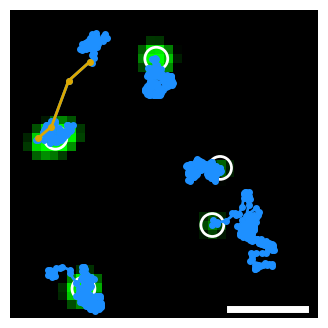

In [2]:
# Configuration parameters
um_per_pixel = 0.117
s_per_frame = 2
folder_data = r"Z:\\Bisal_Halder_turbo\\PROCESSED_DATA\\Impact_of_cytoskeleton_on_HOPS_condensates\\no_drug\\Analysed Data\\2x\\Trackmate analysis new 07052024\\12062024_for_rep_montage"
folder_save = folder_data

tif_filename = "20240118_UGD-2x-2s-replicate1-FOV-2-bandpass.tif"
csv_filename = "20240118_UGD-2x-2s-replicate1-FOV-2-crop2-wstepflags.csv"

# Load the data
os.chdir(folder_data)
video = imread(tif_filename)
df = pd.read_csv(csv_filename)
df = df.sort_values("t")

# Define parameters
x_min, x_max = 295, 330
y_min, y_max = 490, 524

# Ensure equal range on both axes
x_range = x_max - x_min
y_range = y_max - y_min
max_range = max(x_range, y_range)

x_center = (x_max + x_min) / 2
y_center = (y_max + y_min) / 2

# Adjust limits to ensure square plot
x_min, x_max = x_center - max_range / 2, x_center + max_range / 2
y_min, y_max = y_center - max_range / 2, y_center + max_range / 2

track_color_dodger_blue = "dodgerblue"
track_color_red = "#FF0000"
track_color_195_unflagged = "dodgerblue"
track_color_195_flagged = "#dca800"
condensate_color = "#00FF00"  # Green for condensate
cmap_condensate = clr.LinearSegmentedColormap.from_list("condensateCmap", ["black", condensate_color])  # Black background

scalebar_length_um = 1
scalebar_length_pxl = scalebar_length_um / um_per_pixel

all_available_frames = set(df["t"].unique())

def find_true_transitions(bool_array):
    ranges = []
    n = len(bool_array)
    i = 0
    while i < n:
        if bool_array[i]:
            start = i - 1 if i > 0 else i  # Include previous point if not at the start
            while i < n and bool_array[i]:
                i += 1
            end = i - 1
            ranges.append((start, end))
        else:
            i += 1
    return ranges

def plot_frame(frame):
    fig, ax = plt.subplots(1, 1, figsize = (4,4))

    # Display the image
    img_red = video[frame - 1, :, :]
    ax.imshow(img_red, cmap=cmap_condensate, vmin=1500, vmax=4000)

    # Add time stamp
    # ax.text(
    #     x_min + 28.5,
    #     y_min + 5.5,
    #     f"{round(frame * s_per_frame, 2)} s",
    #     color="white",
    #     weight="bold",
    #     size=14,
    # )

    # Add HOPS label
    # ax.text(
    #     x_min + 15, 
    #     y_min + 3, 
    #     "Unflagged tracks", 
    #     color=track_color_dodger_blue, 
    #     weight="bold", 
    #     size=16,
    # )
    
    # ax.text(
    #     x_min + 15, 
    #     y_min + 5, 
    #     "Flagged tracks", 
    #     color=track_color_195_unflagged, 
    #     weight="bold", 
    #     size=16,
    # )

    # Iterate over track IDs
    for track_id in df["trackID"].unique():
        track = df[(df["t"] <= frame - 1) & (df["trackID"] == track_id)]
        x_plot = track["x"].to_numpy(float)
        y_plot = track["y"].to_numpy(float)
        flags = track["step_flag"].to_numpy()

        if track_id == 195:
            # Plot entire track in #ab8300 using circle markers
            ax.plot(x_plot, y_plot, '-o', color=track_color_195_unflagged, lw=2, markersize=4)

            # Plot flagged segments in orchid on top
            true_ranges = find_true_transitions(flags)
            for start, end in true_ranges:
                jump_x = x_plot[start:end + 1]
                jump_y = y_plot[start:end + 1]
                ax.plot(jump_x, jump_y, '-o', color=track_color_195_flagged, lw=2, markersize=4, markeredgecolor=track_color_195_flagged)
        else:
            # Plot entire track in dodgerblue using circle markers
            ax.plot(x_plot, y_plot, '-o', color=track_color_dodger_blue, lw=2, markersize=4)

            # Plot flagged segments in red on top
            true_ranges = find_true_transitions(flags)
            for start, end in true_ranges:
                jump_x = x_plot[start:end + 1]
                jump_y = y_plot[start:end + 1]
                ax.plot(jump_x, jump_y, '-o', color=track_color_red, lw=2, markersize=4, markeredgecolor=track_color_red)

    # Highlight current position        
    if frame - 1 in all_available_frames:
        current_df = df[df["t"] == frame - 1]
        for _, row in current_df.iterrows():
            c = plt.Circle(
                (row["x"], row["y"]),
                1.3,
                color="white",
                fill=False,
                lw=2
            )
            ax.add_patch(c)

    # Add scale bar
    base_x = x_min + 25
    base_y = y_max - 1
    ax.plot(
        [base_x, base_x + scalebar_length_pxl],
        [base_y, base_y],
        "-",
        color="white",
        lw=5,
    )

    # Set viewing area
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.invert_yaxis()
    ax.axis("off")

    # Save the figure
    plt.savefig(join(folder_save, "frame_400_representative.png"), dpi=600, bbox_inches='tight')
    plt.show()
    plt.close(fig)

# Calculate which frame corresponds to the 400th second
frame_400_seconds = 400 / s_per_frame

# Plot only the 400th second frame
plot_frame(int(frame_400_seconds))

## Representative image of HOPS condensates trajectory after Nocodazole treatment

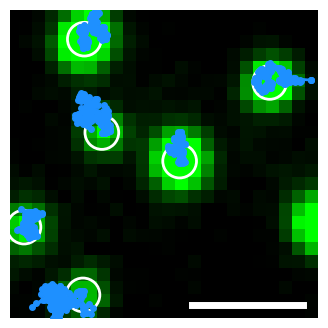

In [5]:
import os
from os.path import exists, join

import matplotlib.animation as animation
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tifffile import imread, imwrite
from matplotlib.animation import FuncAnimation

pd.options.mode.chained_assignment = None  # default='warn'

# Configuration parameters
um_per_pixel = 0.117
s_per_frame = 2
folder_data = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\Nocodazole\20uM\Analysed Data\30min\12092024_rep_overlay_image"
folder_save = folder_data

tif_filename = "20240126_UGD-2x-2s-20uM-Nocodazole-30min-replicate1-FOV-1_crop2.tif"
csv_filename = "20240126_UGD-2x-2s-20uM-Nocodazole-30min-replicate1-FOV-1-wstepflags.csv"

# Load the data
os.chdir(folder_data)
video = imread(tif_filename)
df = pd.read_csv(csv_filename)
df = df.sort_values("t")

# Define parameters
x_min, x_max = df['x'].min(), df['x'].max()
y_min, y_max = df['y'].min(), df['y'].max()

# Ensure equal range on both axes
x_range = x_max - x_min
y_range = y_max - y_min
max_range = max(x_range, y_range)

x_center = (x_max + x_min) / 2
y_center = (y_max + y_min) / 2

# Adjust limits to ensure square plot
x_min, x_max = x_center - max_range / 2, x_center + max_range / 2
y_min, y_max = y_center - max_range / 2, y_center + max_range / 2


track_color_dodger_blue = "dodgerblue"
track_color_red = "#FF0000"
track_color_195_unflagged = "#dca800"
track_color_195_flagged = "magenta"
condensate_color = "#00FF00"  # Green for condensate
cmap_condensate = clr.LinearSegmentedColormap.from_list("condensateCmap", ["black", condensate_color])  # Black background

scalebar_length_um = 1
scalebar_length_pxl = scalebar_length_um / um_per_pixel

all_available_frames = set(df["t"].unique())

def find_true_transitions(bool_array):
    ranges = []
    n = len(bool_array)
    i = 0
    while i < n:
        if bool_array[i]:
            start = i - 1 if i > 0 else i  # Include previous point if not at the start
            while i < n and bool_array[i]:
                i += 1
            end = i - 1
            ranges.append((start, end))
        else:
            i += 1
    return ranges

def plot_frame(frame):
    fig, ax = plt.subplots(1, 1, figsize = (4,4))

    # Display the image
    img_red = video[frame - 1, :, :]
    ax.imshow(img_red, cmap=cmap_condensate, vmin=1500, vmax=4000)

    # Iterate over track IDs
    
    for track_id in df["trackID"].unique():
        track = df[(df["t"] <= frame - 1) & (df["trackID"] == track_id)]
        x_plot = track["x"].to_numpy(float)
        y_plot = track["y"].to_numpy(float)
        flags = track["step_flag"].to_numpy()

        if track_id == 195:
            # Plot entire track in #ab8300 using circle markers
            ax.plot(x_plot, y_plot, '-o', color=track_color_195_unflagged, lw=2, markersize=4)

            # Plot flagged segments in orchid on top
            true_ranges = find_true_transitions(flags)
            for start, end in true_ranges:
                jump_x = x_plot[start:end + 1]
                jump_y = y_plot[start:end + 1]
                ax.plot(jump_x, jump_y, '-o', color=track_color_195_flagged, lw=2, markersize=4, markeredgecolor=track_color_195_flagged)
        else:
            # Plot entire track in dodgerblue using circle markers
            ax.plot(x_plot, y_plot, '-o', color=track_color_dodger_blue, lw=2, markersize=4)

            # Plot flagged segments in red on top
            true_ranges = find_true_transitions(flags)
            for start, end in true_ranges:
                jump_x = x_plot[start:end + 1]
                jump_y = y_plot[start:end + 1]
                ax.plot(jump_x, jump_y, '-o', color=track_color_red, lw=2, markersize=4, markeredgecolor=track_color_red)

    # Highlight current position        
    if frame - 1 in all_available_frames:
        current_df = df[df["t"] == frame - 1]
        for _, row in current_df.iterrows():
            c = plt.Circle(
                (row["x"], row["y"]),
                1.3,
                color="white",
                fill=False,
                lw=2
            )
            ax.add_patch(c)

    # Add scale bar
    base_x = x_min + 14
    base_y = y_max - 1
    ax.plot(
        [base_x, base_x + scalebar_length_pxl],
        [base_y, base_y],
        "-",
        color="white",
        lw=5,
    )

    # Set viewing area
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect('equal', 'box')
    ax.invert_yaxis()
    ax.axis("off")

    # Save the figure
    plt.savefig(join(folder_save, "frame_400_representative_Noco.png"), dpi=600, bbox_inches='tight')
    plt.show()
    plt.close(fig)

# Calculate which frame corresponds to the 400th second
frame_400_seconds = 400 / s_per_frame

# Plot only the 400th second frame
plot_frame(int(frame_400_seconds))



## Representative image of HOPS condensates trajectory after LatrunculinA treatment

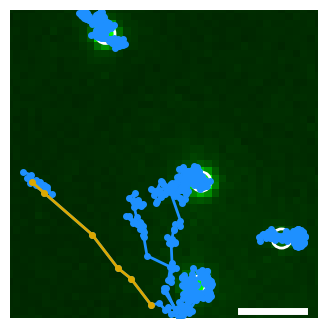

In [6]:
import os
from os.path import exists, join

import matplotlib.animation as animation
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tifffile import imread, imwrite
from matplotlib.animation import FuncAnimation

pd.options.mode.chained_assignment = None  # default='warn'

# Configuration parameters
um_per_pixel = 0.117
s_per_frame = 2
folder_data = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\LatrunculinA\5uM\2x\representative_overlay_image"
folder_save = folder_data

tif_filename = "20240314_UGD-2x-2s-5uM-LatrunculinA-30min-replicate1-FOV-1_crop2.tif"
csv_filename = "20240314_UGD-2x-2s-5uM-LatrunculinA-30min-replicate1-FOV-wstepflags.csv"

# Load the data
os.chdir(folder_data)
video = imread(tif_filename)
df = pd.read_csv(csv_filename)
df = df.sort_values("t")

# Define parameters
x_min, x_max = df['x'].min(), df['x'].max()
y_min, y_max = df['y'].min(), df['y'].max()

# Ensure equal range on both axes
x_range = x_max - x_min
y_range = y_max - y_min
max_range = max(x_range, y_range)

x_center = (x_max + x_min) / 2
y_center = (y_max + y_min) / 2

# Adjust limits to ensure square plot
x_min, x_max = x_center - max_range / 2, x_center + max_range / 2
y_min, y_max = y_center - max_range / 2, y_center + max_range / 2

track_color_dodger_blue = "dodgerblue"
track_color_red = "#FF0000"
track_color_0_unflagged = "dodgerblue"
track_color_0_flagged = "#dca800"
condensate_color = "#00FF00"  # Green for condensate
cmap_condensate = clr.LinearSegmentedColormap.from_list("condensateCmap", ["black", condensate_color])  # Black background

scalebar_length_um = 1
scalebar_length_pxl = scalebar_length_um / um_per_pixel

all_available_frames = set(df["t"].unique())

def find_true_transitions(bool_array):
    ranges = []
    n = len(bool_array)
    i = 0
    while i < n:
        if bool_array[i]:
            start = i - 1 if i > 0 else i  # Include previous point if not at the start
            while i < n and bool_array[i]:
                i += 1
            end = i - 1
            ranges.append((start, end))
        else:
            i += 1
    return ranges

def plot_frame(frame):
    fig, ax = plt.subplots(1, 1, figsize = (4,4))

    # Display the image
    img_red = video[frame - 1, :, :]
    ax.imshow(img_red, cmap=cmap_condensate, vmin=100, vmax=2400)

    # Iterate over track IDs
    for track_id in df["trackID"].unique():
        track = df[(df["t"] <= frame - 1) & (df["trackID"] == track_id)]
        x_plot = track["x"].to_numpy(float)
        y_plot = track["y"].to_numpy(float)
        flags = track["step_flag"].to_numpy()

        if track_id == 0:
            # Plot entire track in #ab8300 using circle markers
            ax.plot(x_plot, y_plot, '-o', color=track_color_0_unflagged, lw=2, markersize=4)

            # Plot flagged segments in orchid on top
            true_ranges = find_true_transitions(flags)
            for start, end in true_ranges:
                jump_x = x_plot[start:end + 1]
                jump_y = y_plot[start:end + 1]
                ax.plot(jump_x, jump_y, '-o', color=track_color_0_flagged, lw=2, markersize=4, markeredgecolor=track_color_0_flagged)
        else:
            # Plot entire track in dodgerblue using circle markers
            ax.plot(x_plot, y_plot, '-o', color=track_color_dodger_blue, lw=2, markersize=4)

            # Plot flagged segments in red on top
            true_ranges = find_true_transitions(flags)
            for start, end in true_ranges:
                jump_x = x_plot[start:end + 1]
                jump_y = y_plot[start:end + 1]
                ax.plot(jump_x, jump_y, '-o', color=track_color_red, lw=2, markersize=4, markeredgecolor=track_color_red)

    # Highlight current position        
    if frame - 1 in all_available_frames:
        current_df = df[df["t"] == frame - 1]
        for _, row in current_df.iterrows():
            c = plt.Circle(
                (row["x"], row["y"]),
                1.3,
                color="white",
                fill=False,
                lw=2
            )
            ax.add_patch(c)

    # Add scale bar
    base_x = x_min + 31.4
    base_y = y_max - 1
    ax.plot(
        [base_x, base_x + scalebar_length_pxl],
        [base_y, base_y],
        "-",
        color="white",
        lw=5,
    )

    # Set viewing area
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_aspect('equal', 'box')
    ax.invert_yaxis()
    ax.axis("off")

    # Save the figure
    plt.savefig(join(folder_save, "frame_400_representative_latA.png"), dpi=300, bbox_inches='tight')
    plt.show()
    plt.close(fig)

# Calculate which frame corresponds to the 400th second
frame_400_seconds = 400 / s_per_frame

# Plot only the 400th second frame
plot_frame(int(frame_400_seconds))



## Representative hopping trajectory

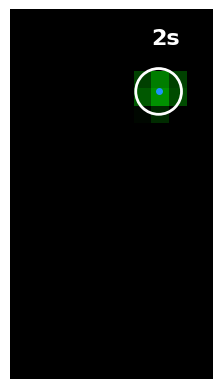

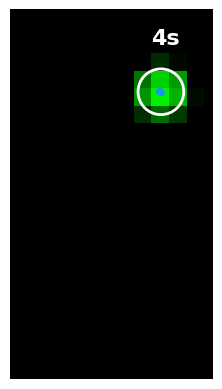

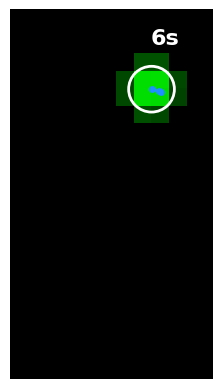

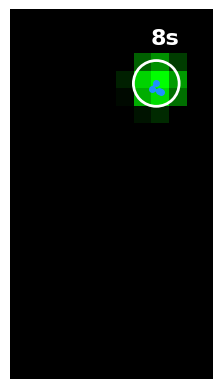

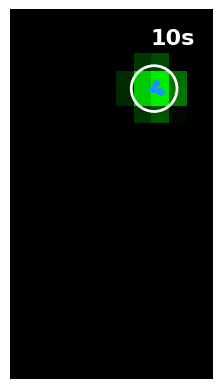

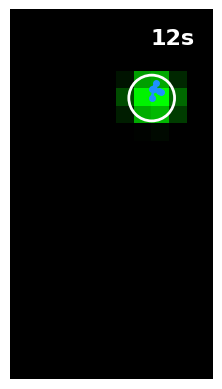

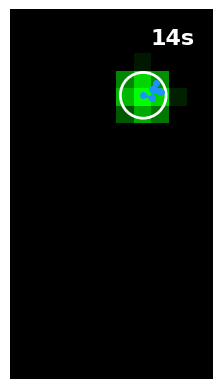

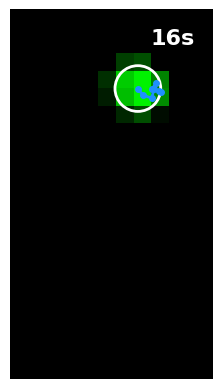

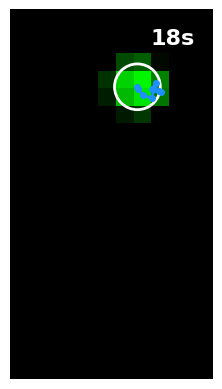

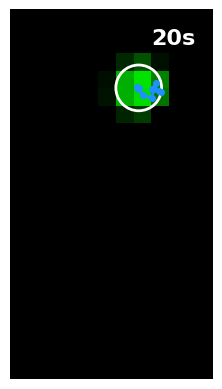

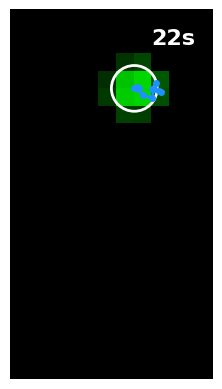

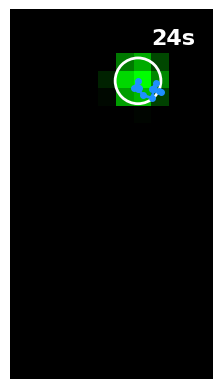

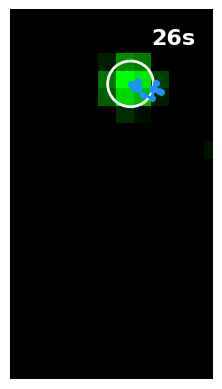

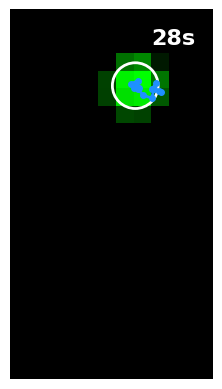

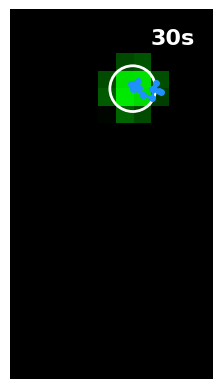

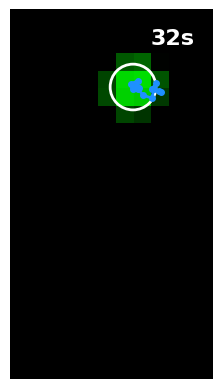

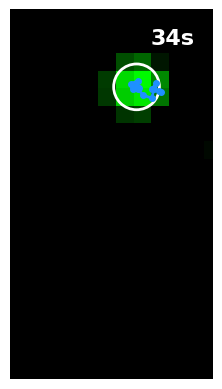

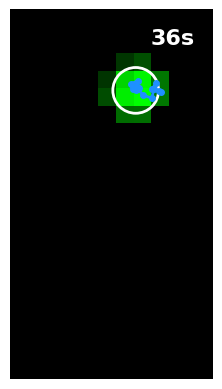

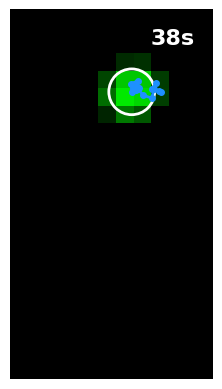

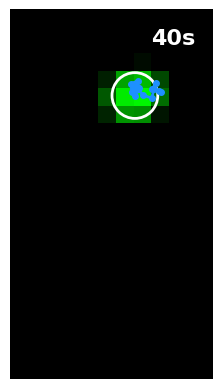

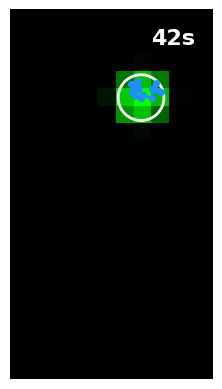

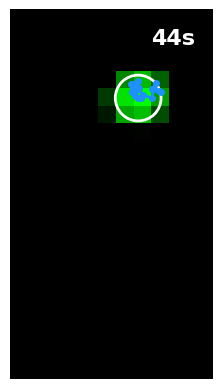

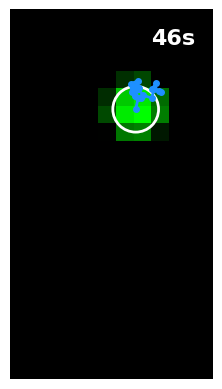

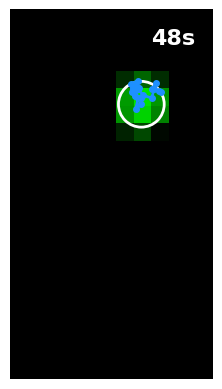

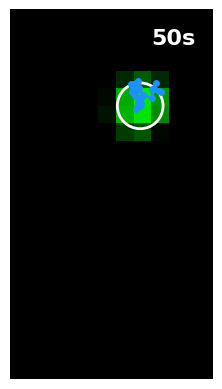

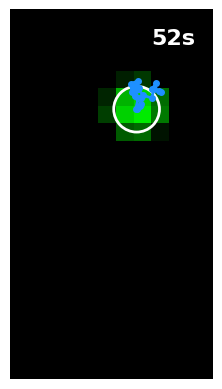

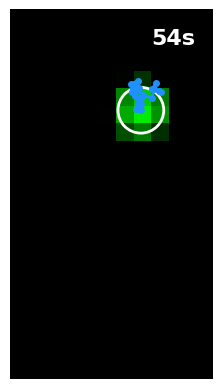

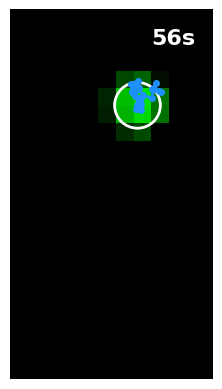

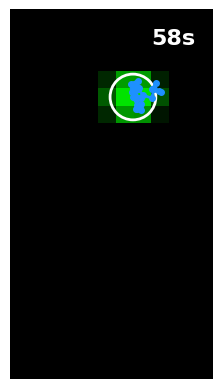

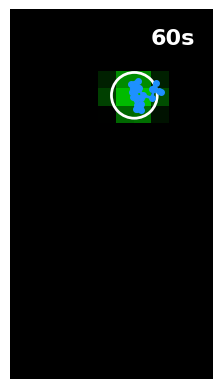

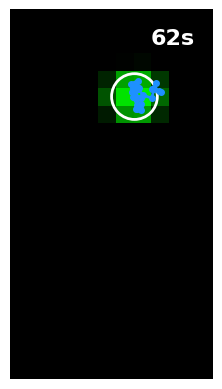

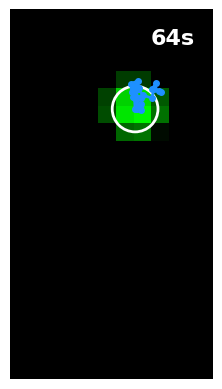

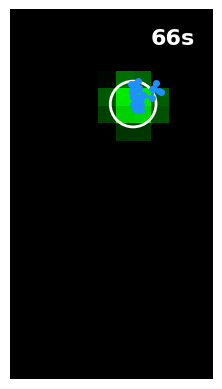

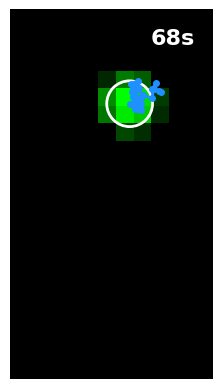

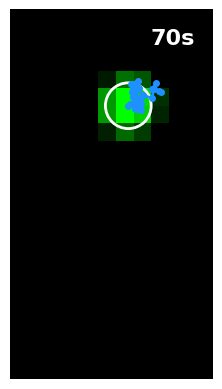

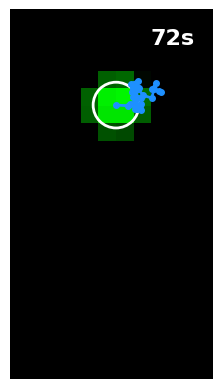

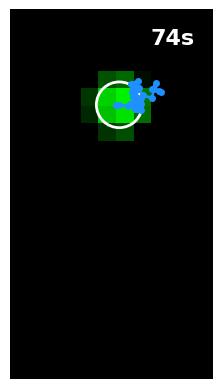

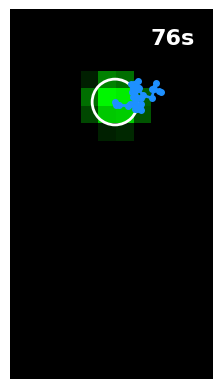

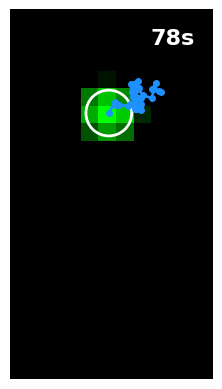

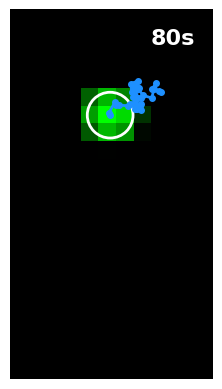

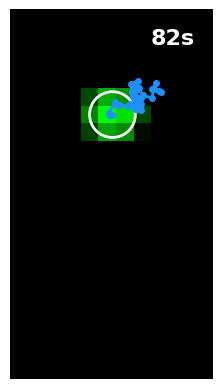

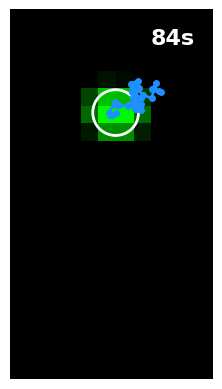

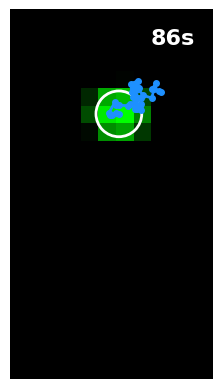

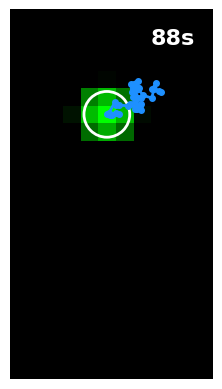

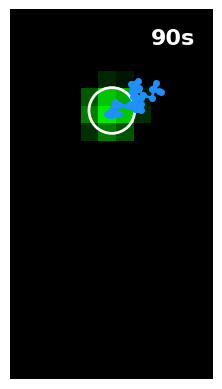

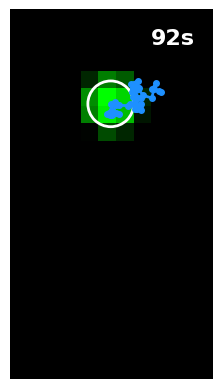

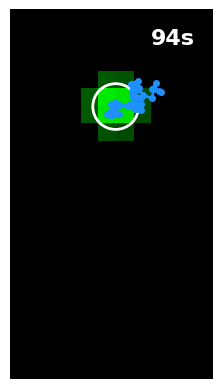

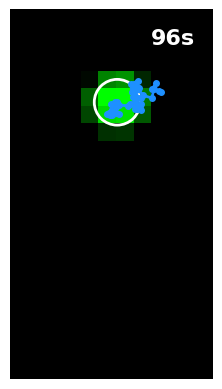

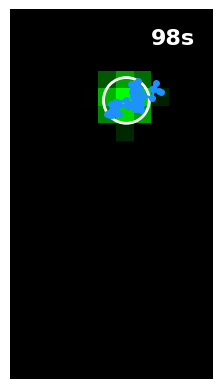

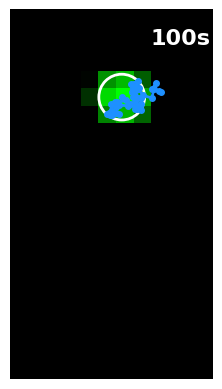

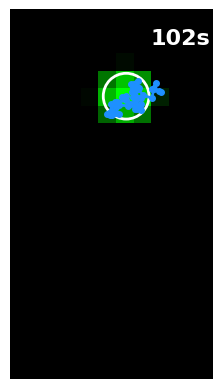

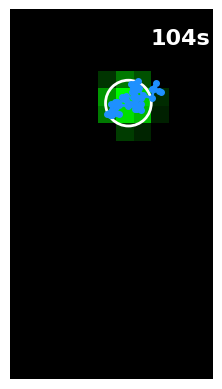

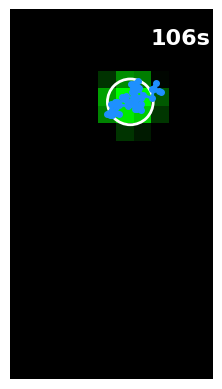

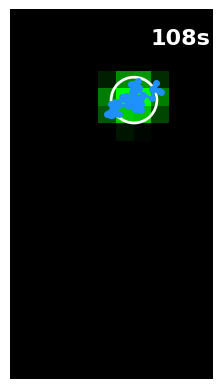

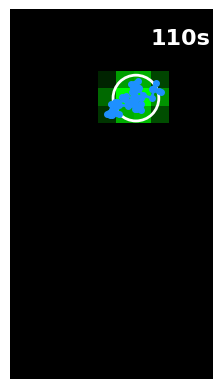

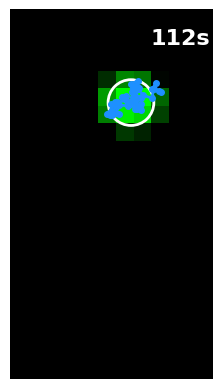

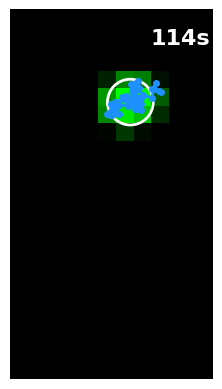

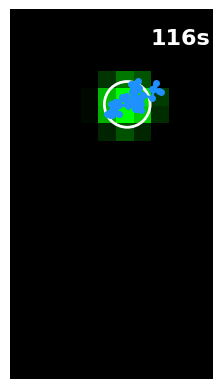

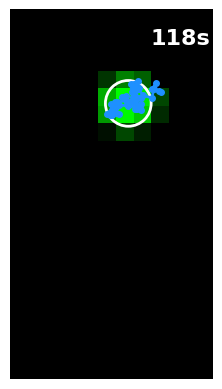

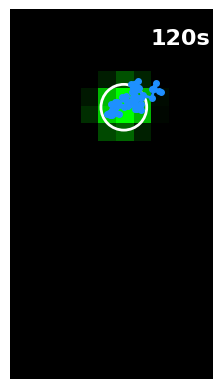

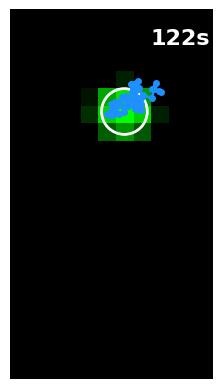

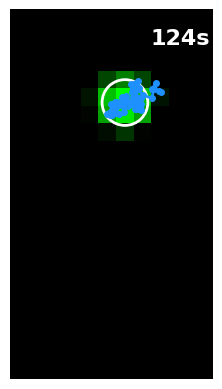

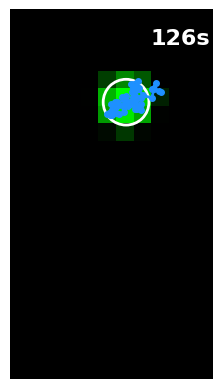

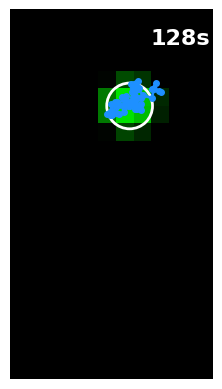

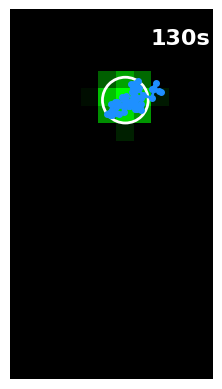

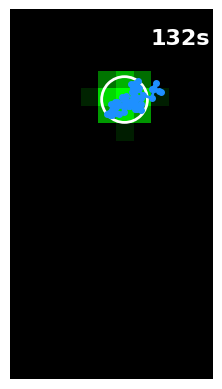

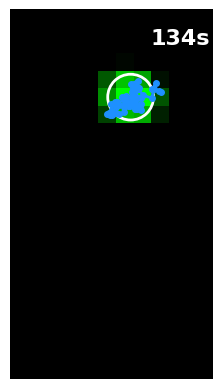

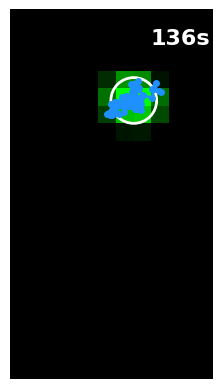

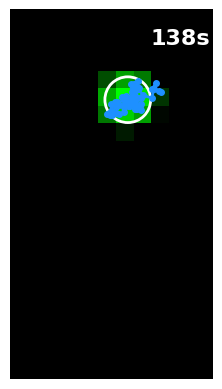

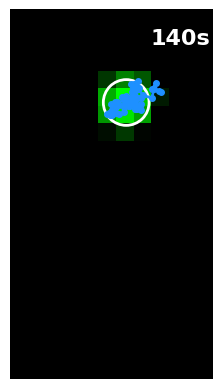

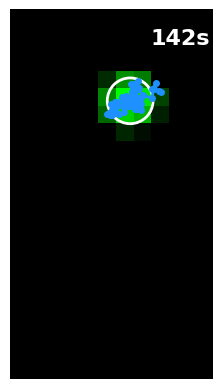

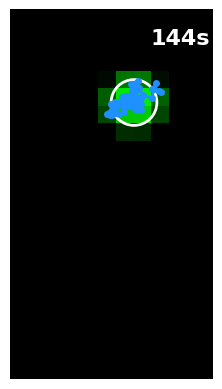

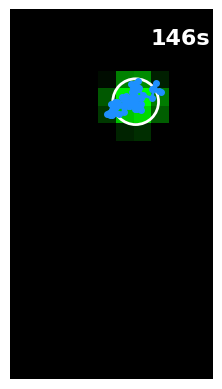

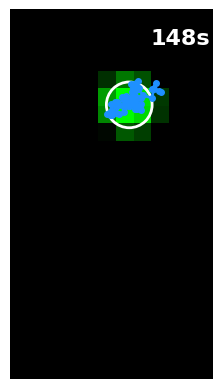

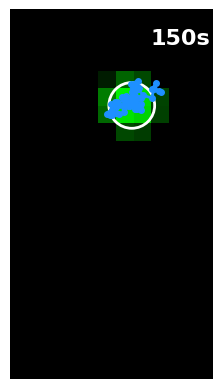

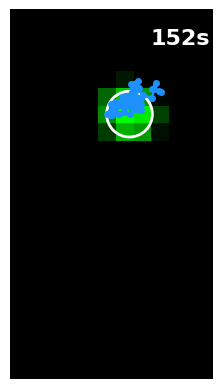

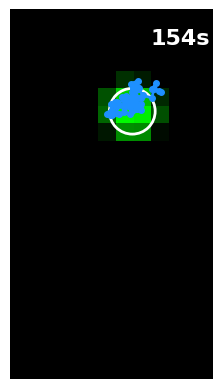

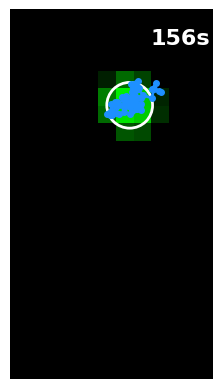

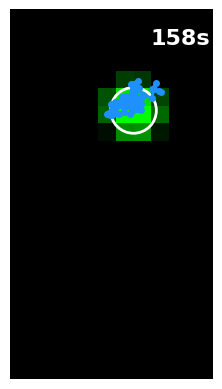

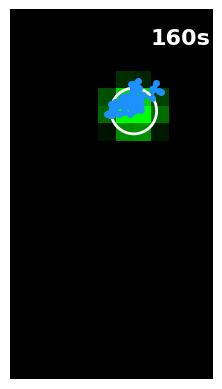

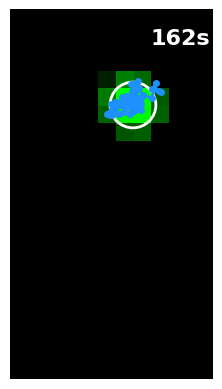

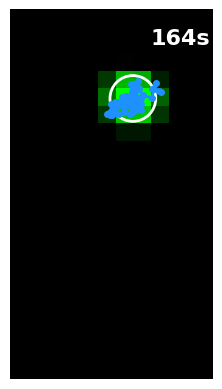

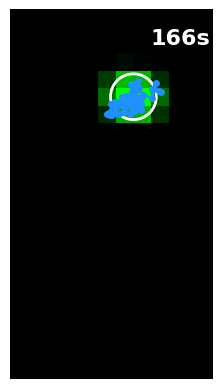

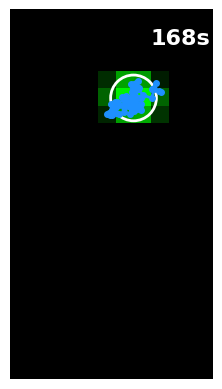

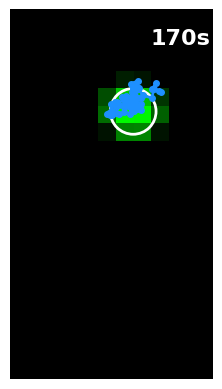

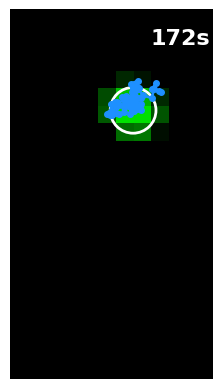

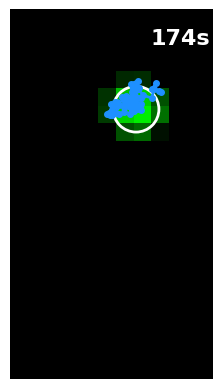

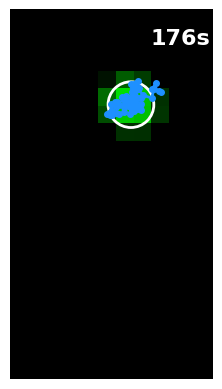

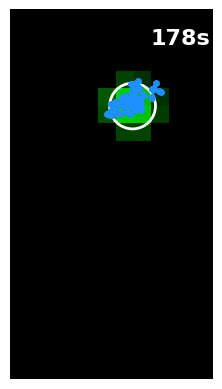

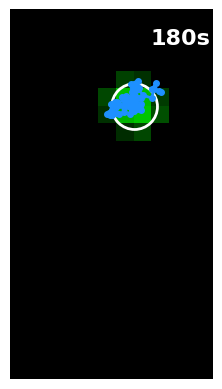

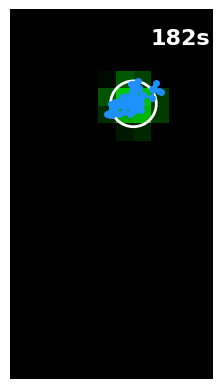

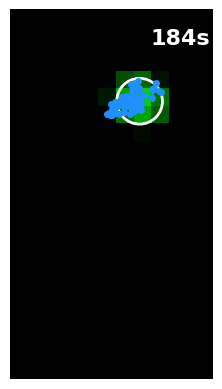

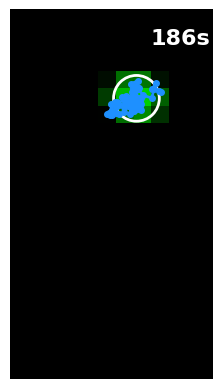

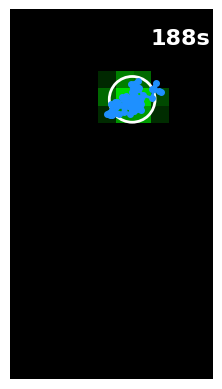

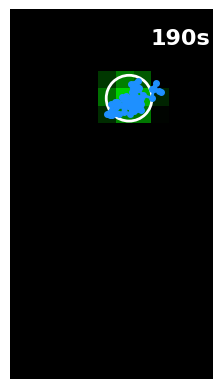

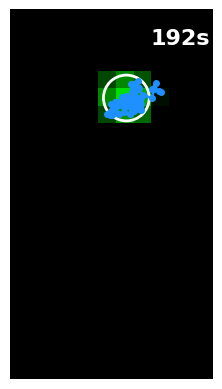

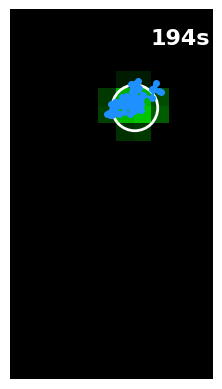

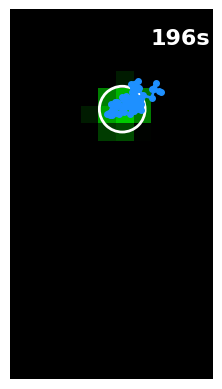

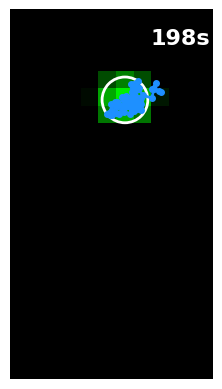

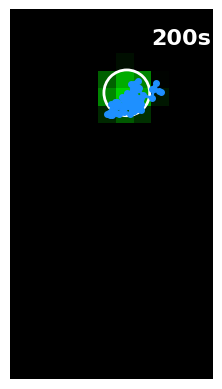

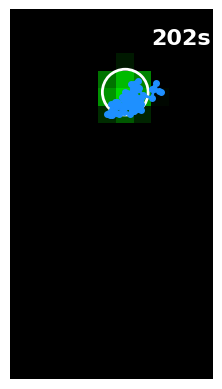

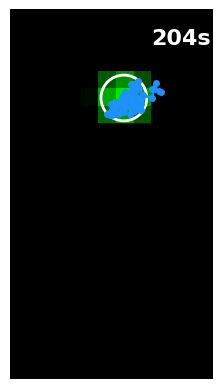

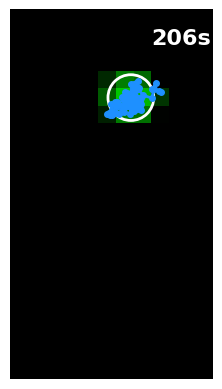

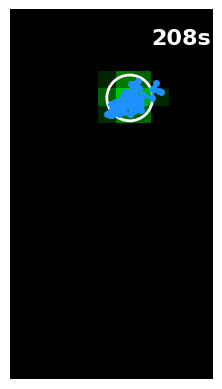

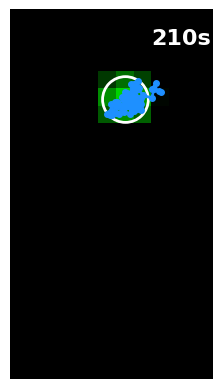

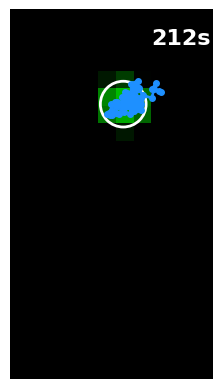

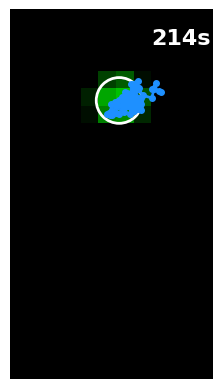

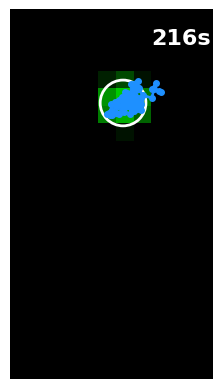

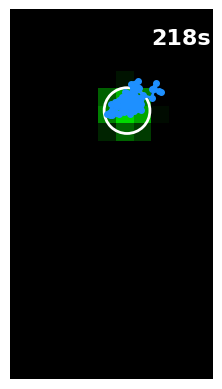

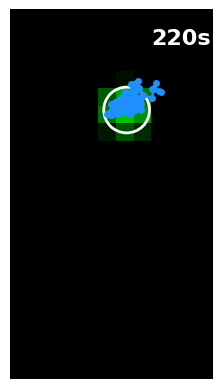

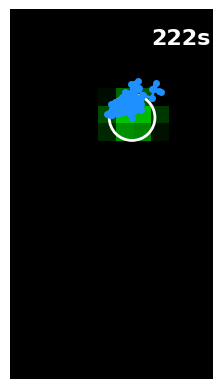

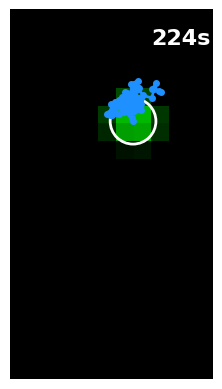

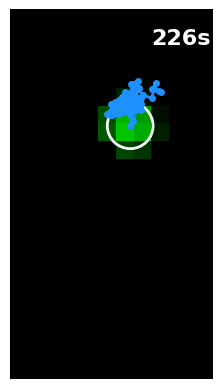

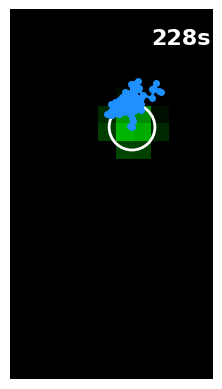

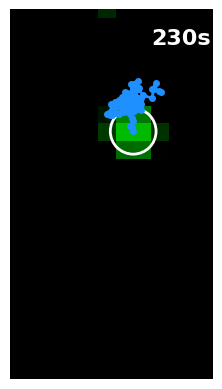

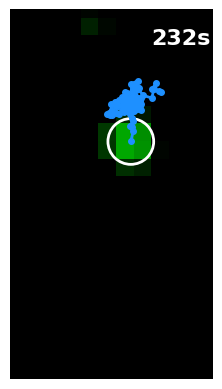

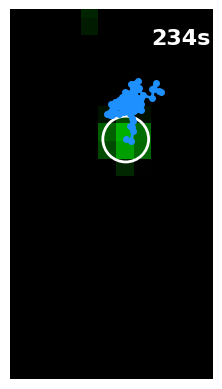

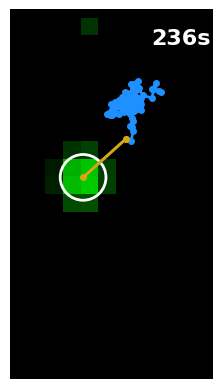

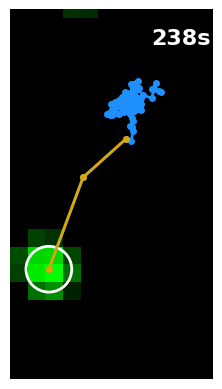

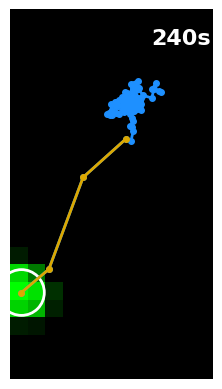

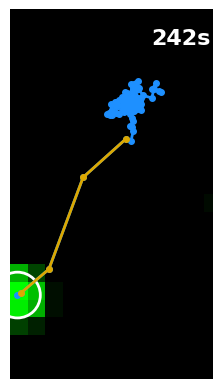

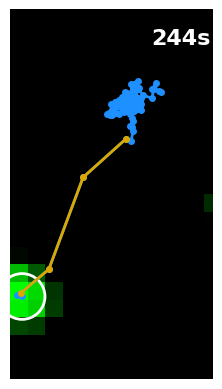

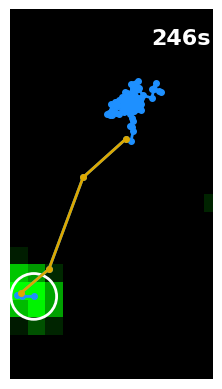

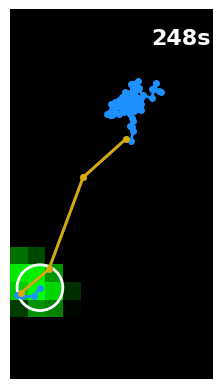

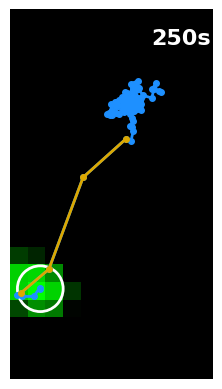

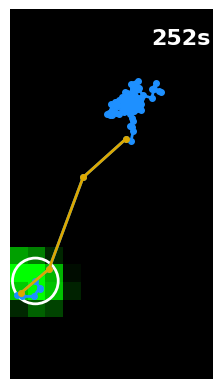

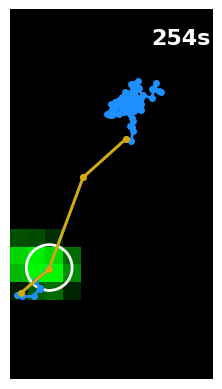

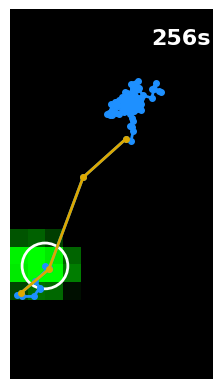

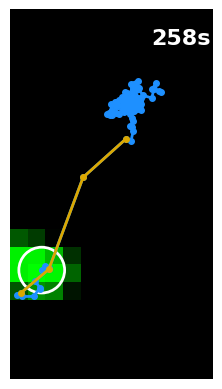

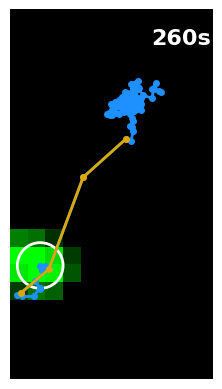

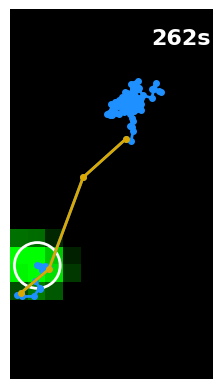

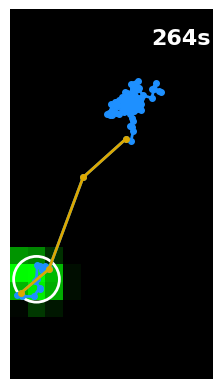

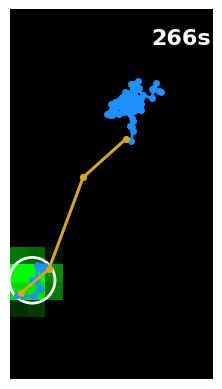

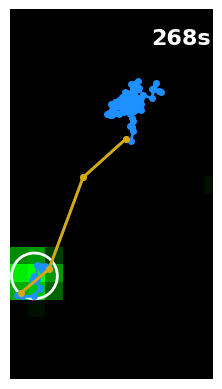

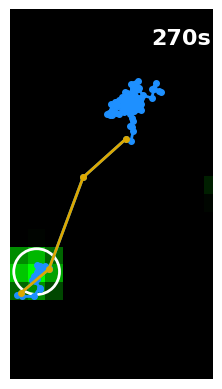

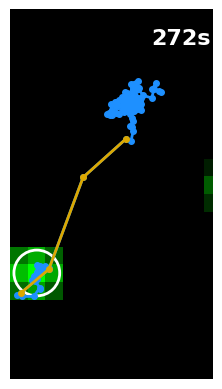

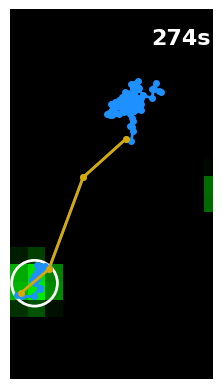

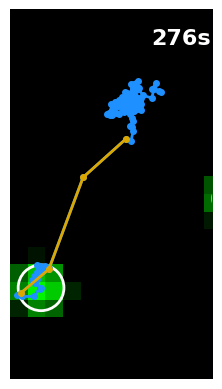

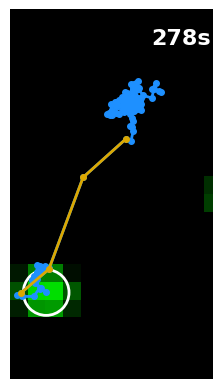

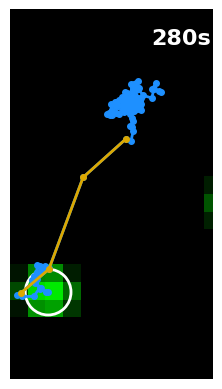

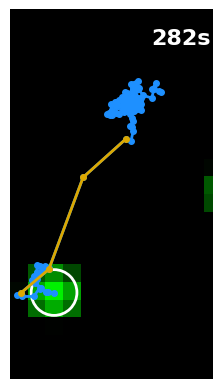

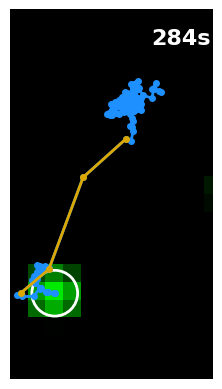

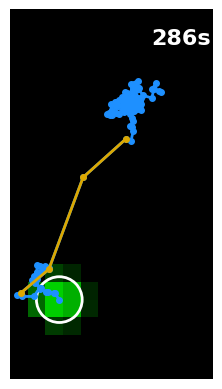

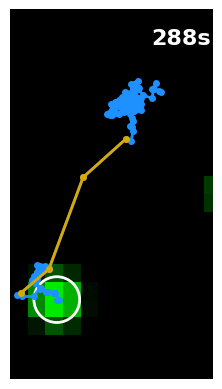

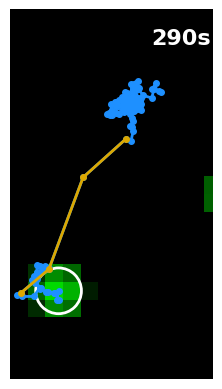

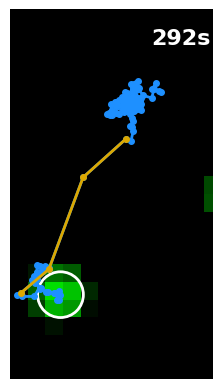

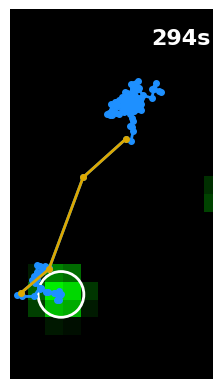

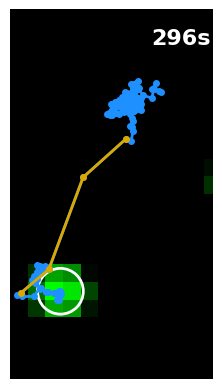

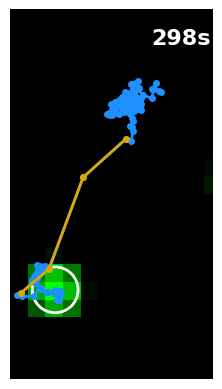

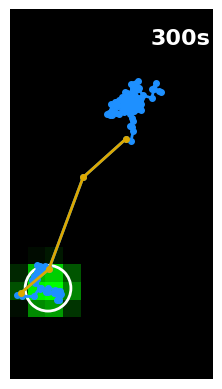

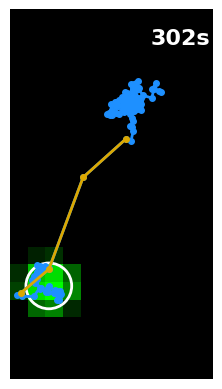

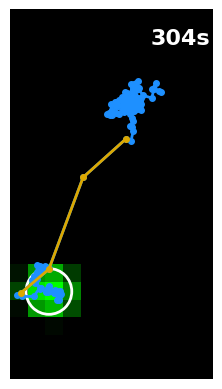

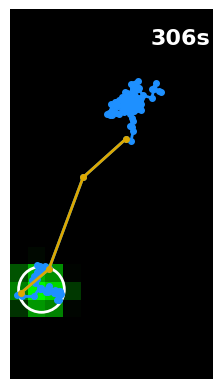

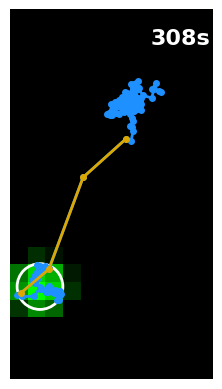

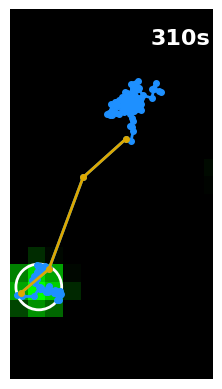

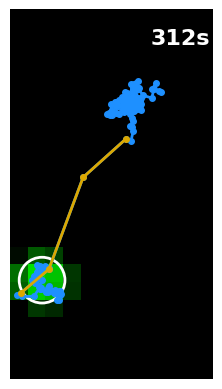

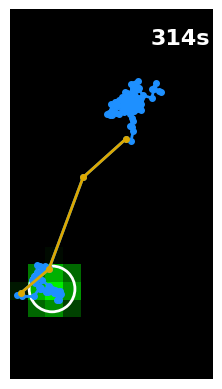

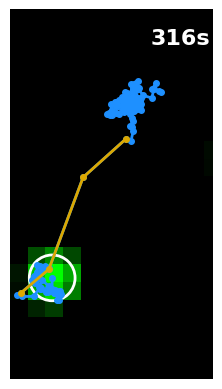

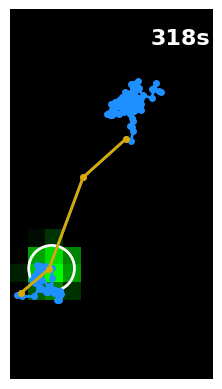

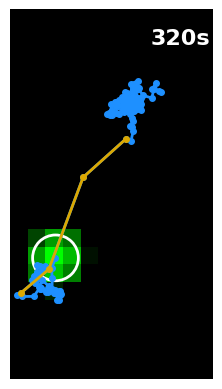

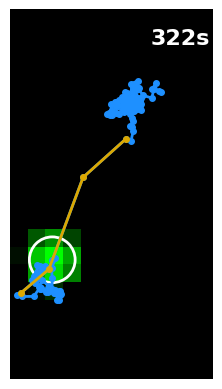

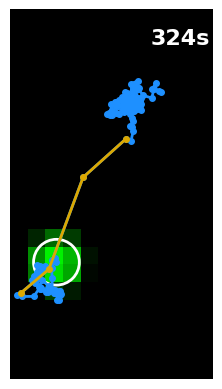

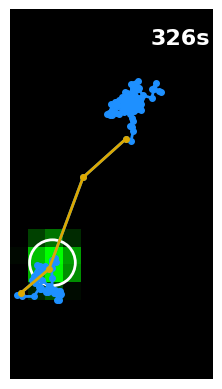

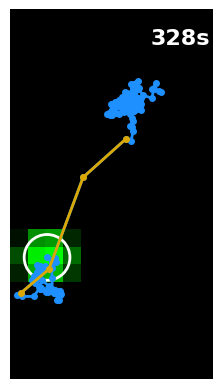

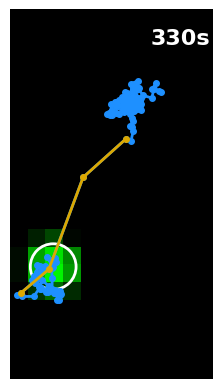

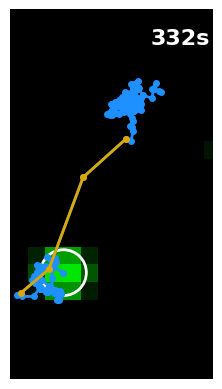

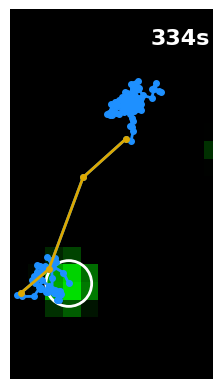

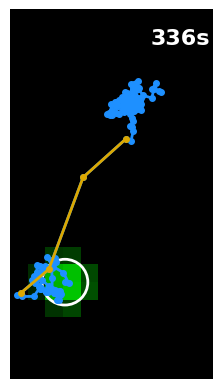

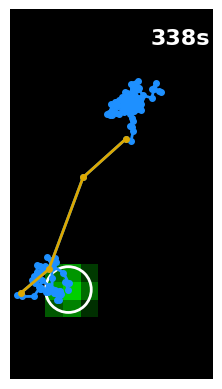

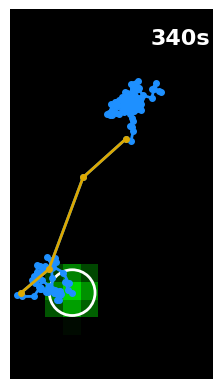

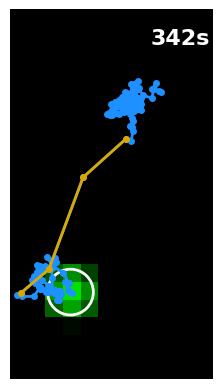

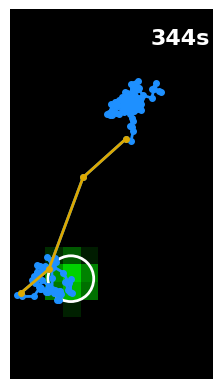

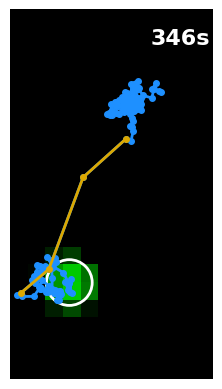

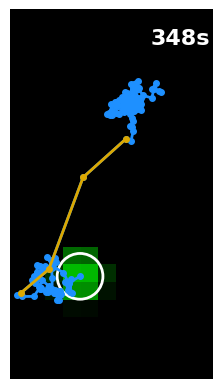

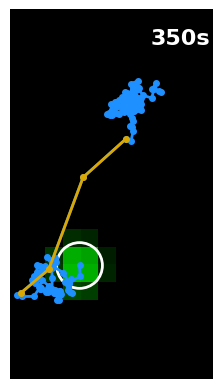

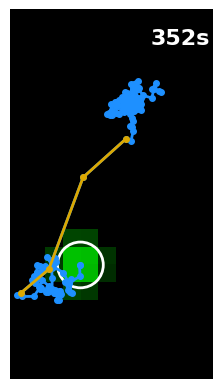

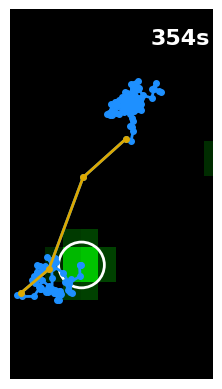

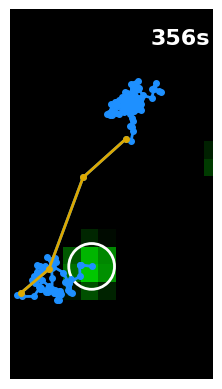

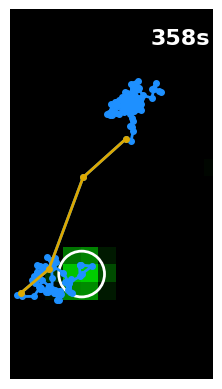

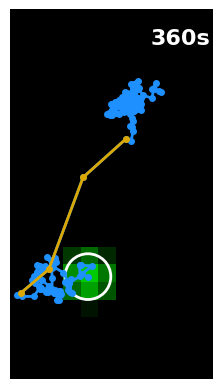

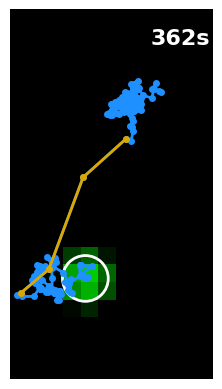

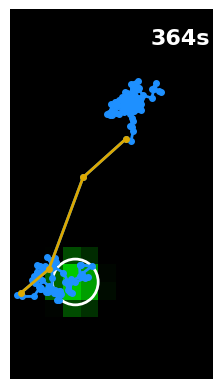

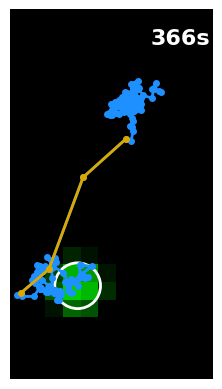

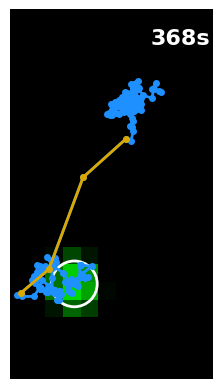

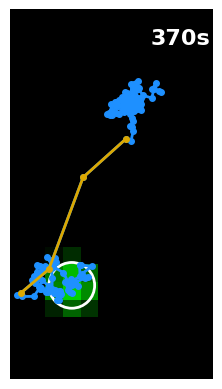

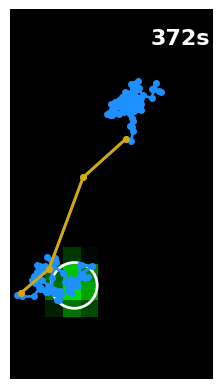

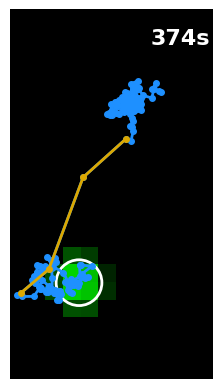

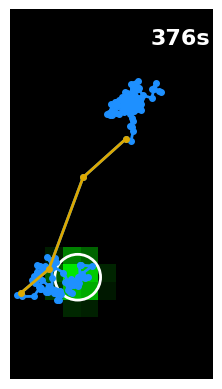

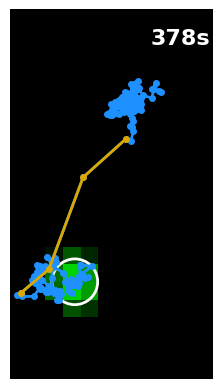

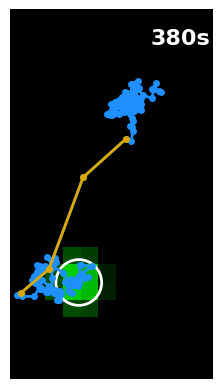

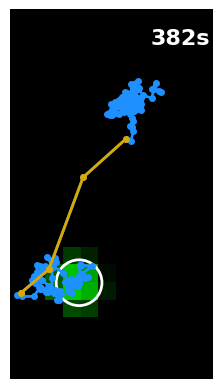

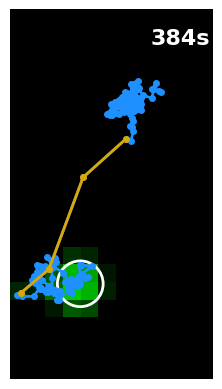

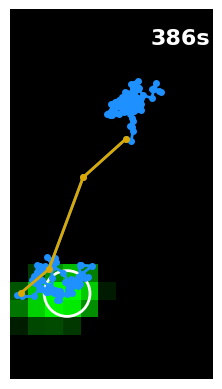

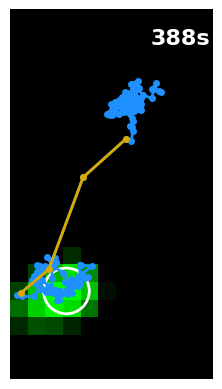

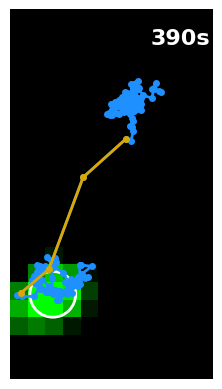

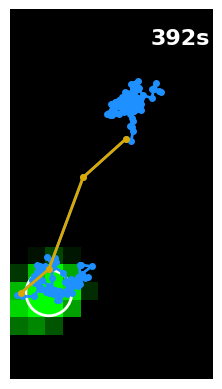

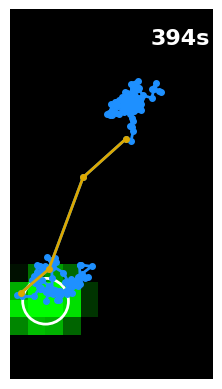

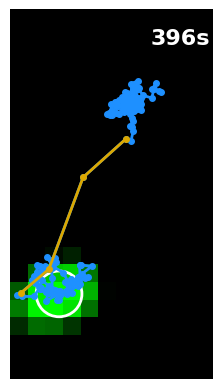

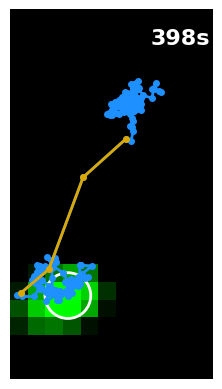

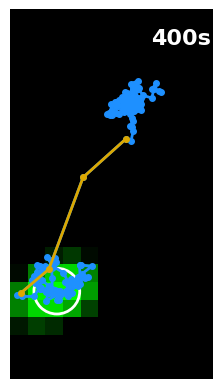

In [4]:
# Configuration parameters
um_per_pixel = 0.117
s_per_frame = 2
folder_data = r"Z:\\Bisal_Halder_turbo\\PROCESSED_DATA\\Impact_of_cytoskeleton_on_HOPS_condensates\\no_drug\\Analysed Data\\2x\\Trackmate analysis new 07052024\\12062024_for_rep_montage"
folder_save = folder_data

tif_filename = "20240118_UGD-2x-2s-replicate1-FOV-2-bandpass.tif"
csv_filename = "20240118_UGD-2x-2s-replicate1-FOV-2-crop2-wstepflags.csv"

# Load the data
os.chdir(folder_data)
video = imread(tif_filename)
df = pd.read_csv(csv_filename)
df = df.sort_values("t")

# Define parameters
x_min, x_max = 297.5, 309
y_min, y_max = 488, 509
track_color_195_unflagged = "dodgerblue"
track_color_195_flagged = "#dca800"
condensate_color = "#00FF00"
cmap_condensate = clr.LinearSegmentedColormap.from_list("condensateCmap", ["black", condensate_color])

scalebar_length_um = 1
scalebar_length_pxl = scalebar_length_um / um_per_pixel

all_available_frames = set(df["t"].unique())

# Function to find the true transitions
def find_true_transitions(bool_array):
    ranges = []
    n = len(bool_array)
    i = 0
    while i < n:
        if bool_array[i]:
            start = i - 1 if i > 0 else i  # Include previous point if not at the start
            while i < n and bool_array[i]:
                i += 1
            end = i - 1
            ranges.append((start, end))
        else:
            i += 1
    return ranges

def animate(frame):
    fig, ax = plt.subplots(1, 1)
    
    # Display the image
    img_red = video[frame - 1, :, :]
    ax.imshow(img_red, cmap=cmap_condensate, vmin=2200, vmax=5000)

    # Add time stamp
    ax.text(
        x_min + 8,
        y_min + 2,
        f"{round(frame * s_per_frame, 2)}s",
        color="white",
        weight="bold",
        size=16,
    )

    # Add tracks
    for track_id in df['trackID'].unique():
        track = df[(df["t"] <= frame - 1) & (df['trackID'] == track_id)]
        
        if track_id == 195:
            flags = track["step_flag"].to_numpy()
            x_plot = track["x"].to_numpy(float)
            y_plot = track["y"].to_numpy(float)

            # Plot unflagged segments in #dca800
            ax.plot(
                x_plot,
                y_plot,
                "-o",
                color=track_color_195_unflagged,
                lw=2,
                markersize=4
            )
            
            # Plot flagged segments in magenta
            true_ranges = find_true_transitions(flags)
            for start, end in true_ranges:
                if end < len(x_plot):  
                    ax.plot(
                        x_plot[start: end + 1],
                        y_plot[start: end + 1],
                        "-o",
                        color=track_color_195_flagged,
                        lw=2,
                        markersize=4,
                        markeredgecolor=track_color_195_flagged
                    )
        else:
            x_plot = track["x"].to_numpy(float)
            y_plot = track["y"].to_numpy(float)
            ax.plot(
                x_plot,
                y_plot,
                "-o",
                color=track_color_195_unflagged,
                lw=2,
                markersize=4
            )

    # Highlight current position        
    if frame - 1 in all_available_frames:
        current_df = df[df["t"] == frame - 1]
        for _, row in current_df.iterrows():
            c = plt.Circle(
                (row["x"], row["y"]), 
                1.3, 
                color="white", 
                fill=False, 
                lw=2
            )
            ax.add_patch(c)

    # Add scale bar
    base_x = x_min + 25
    base_y = y_max - 1
    ax.plot(
        [base_x, base_x + scalebar_length_pxl],
        [base_y, base_y],
        "-",
        color="white",
        lw=5,
    )

    # Set viewing area
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.invert_yaxis()
    ax.axis("off")

    # Save the figure
    plt.savefig(join(folder_save, f"hopping_frame_{frame:03d}.png"), dpi=600, bbox_inches='tight')
    plt.show()
    plt.close(fig)

# Create montage images
num_frames = 200
for frame in range(1, num_frames + 1):
    animate(frame)

# Optional: Create video
# ani = FuncAnimation(plt.figure(), animate, frames=200, interval=20, repeat=False)
# writer = animation.FFMpegWriter(fps=20)
# ani.save(join(folder_save, "VideoS_HOPS_Confinement_Jump.mp4"), writer=writer, dpi=600)

## Representative confined trajectory

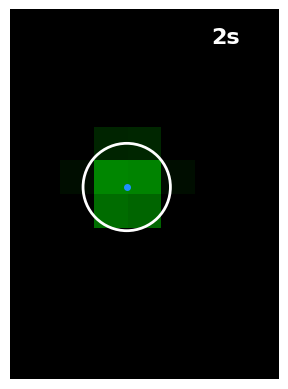

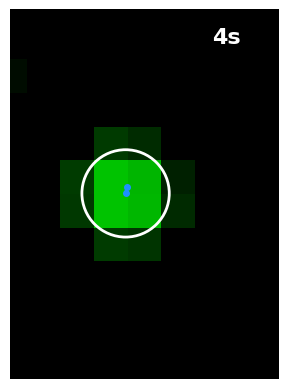

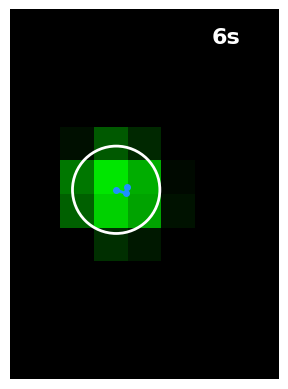

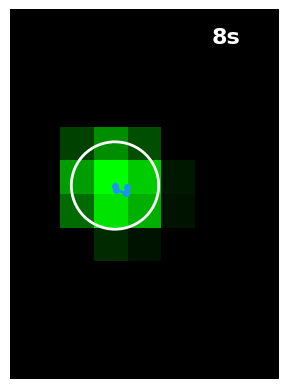

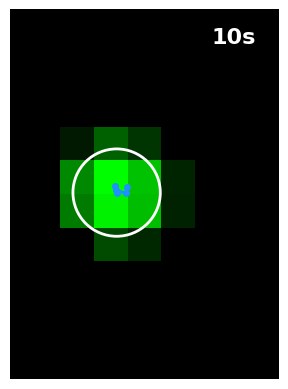

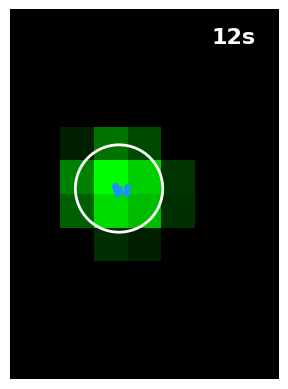

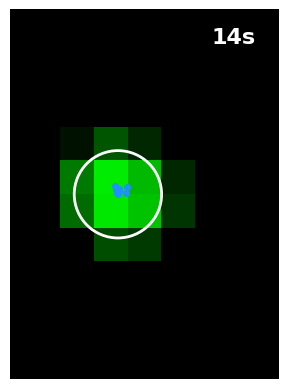

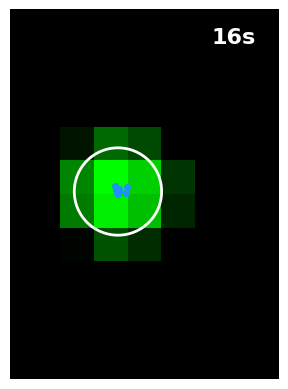

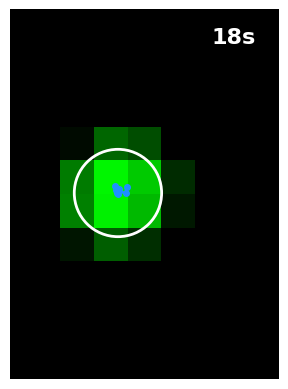

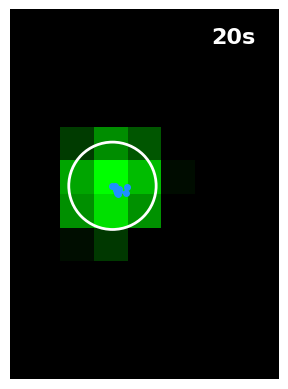

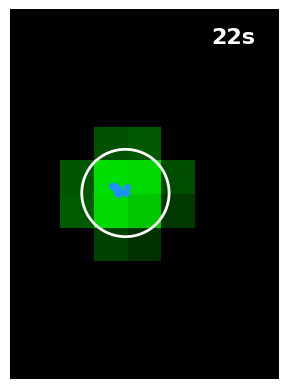

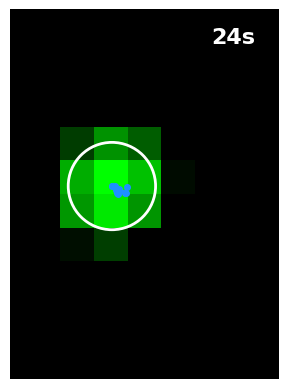

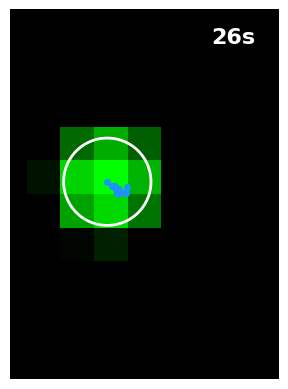

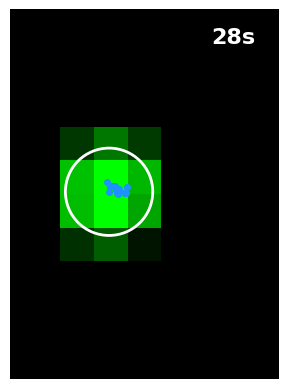

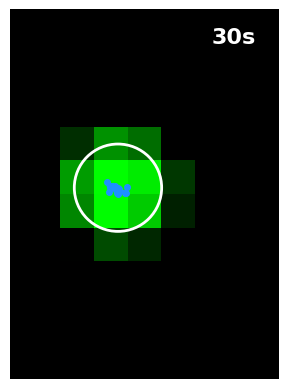

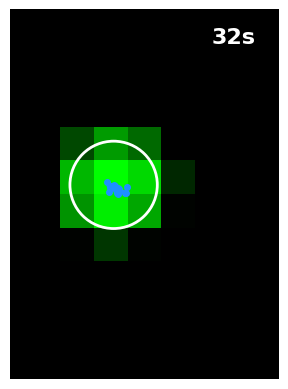

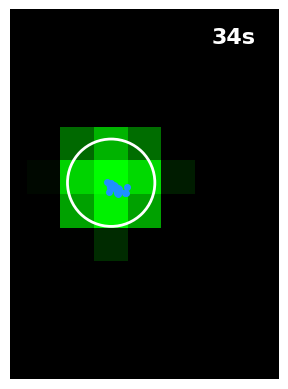

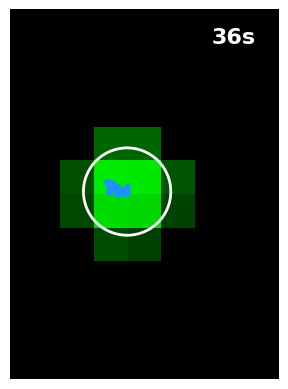

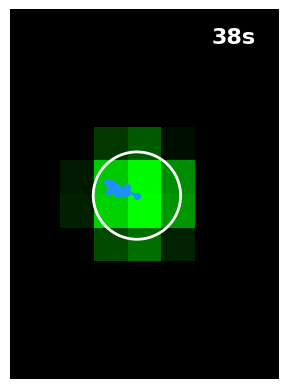

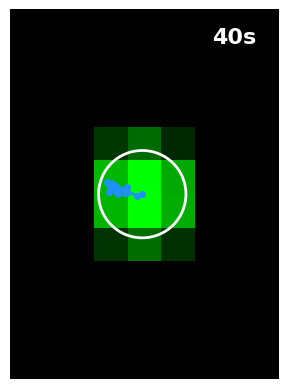

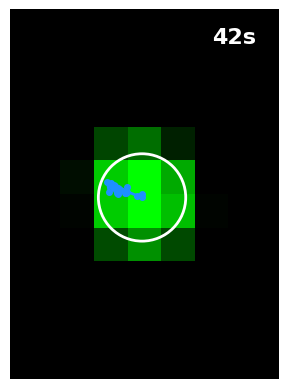

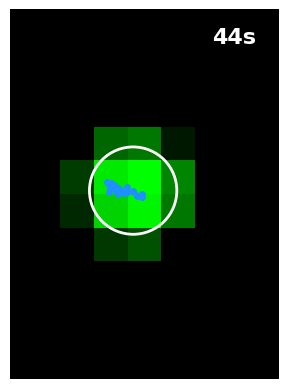

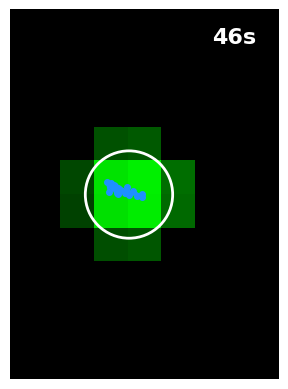

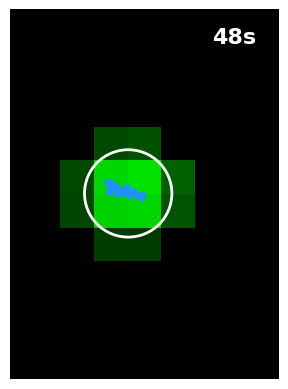

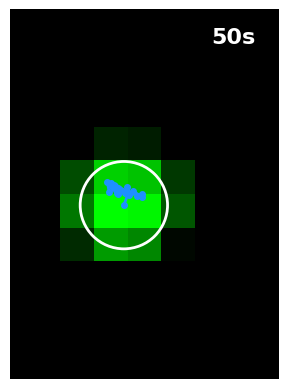

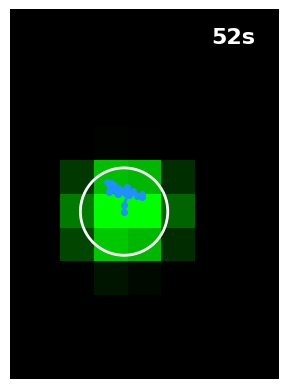

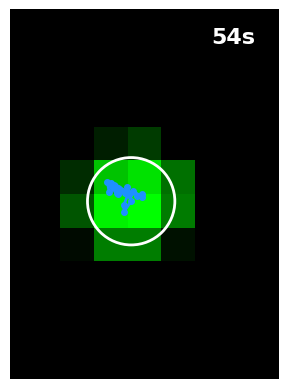

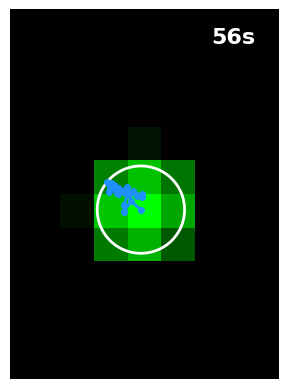

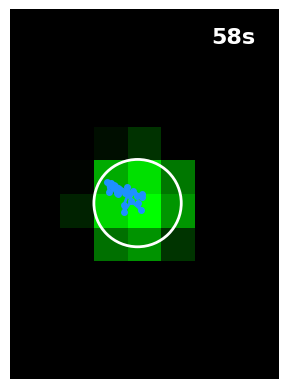

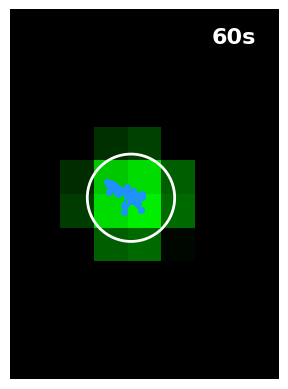

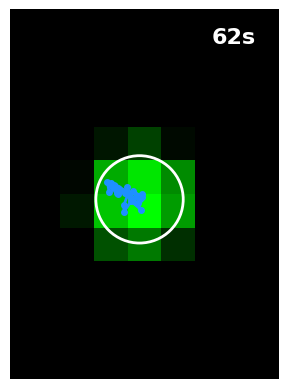

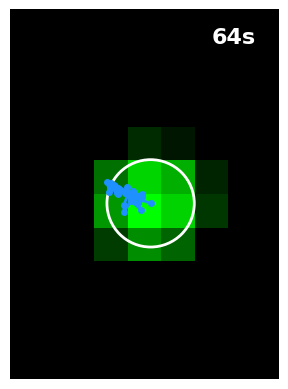

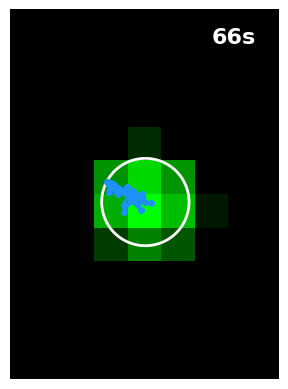

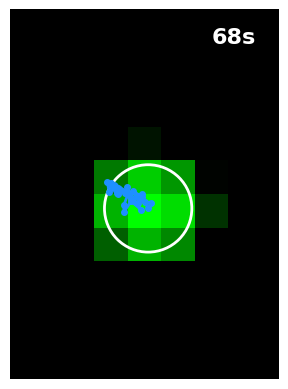

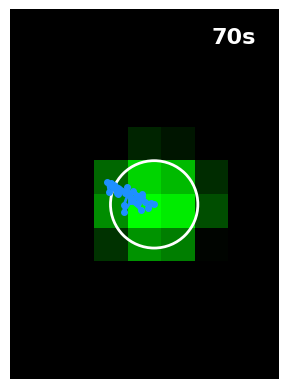

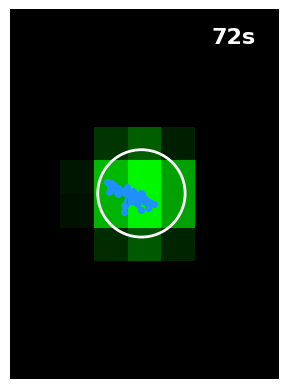

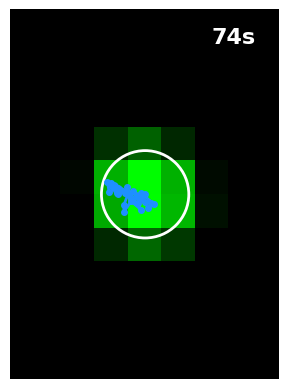

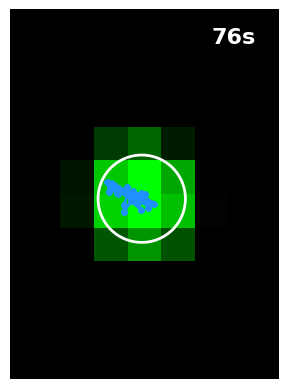

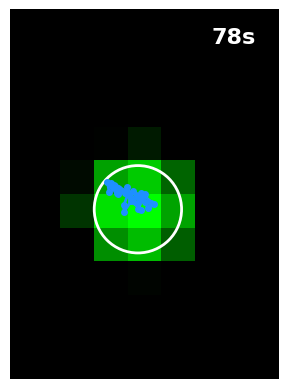

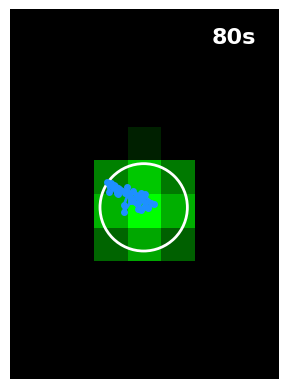

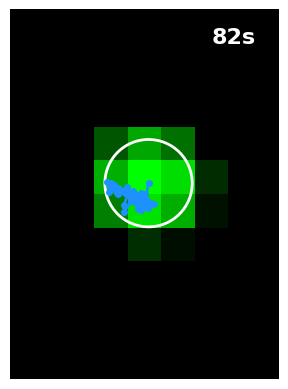

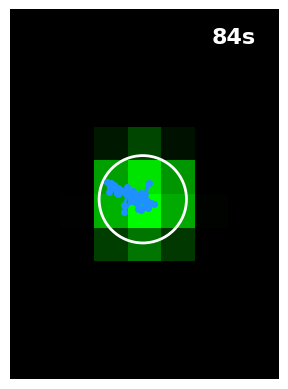

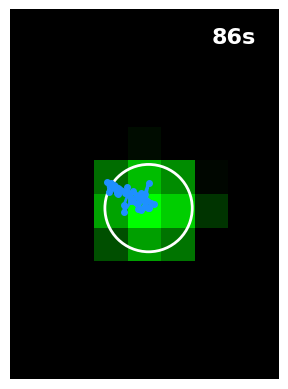

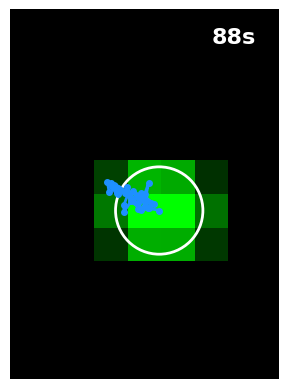

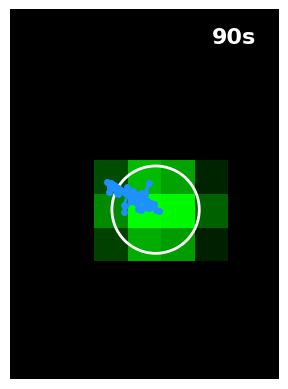

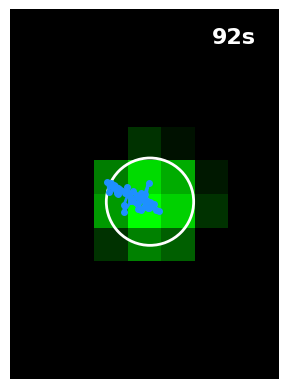

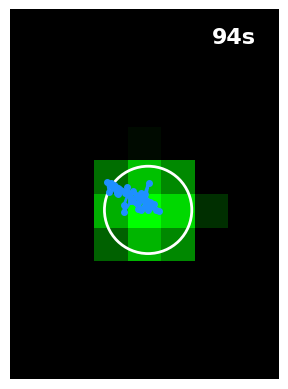

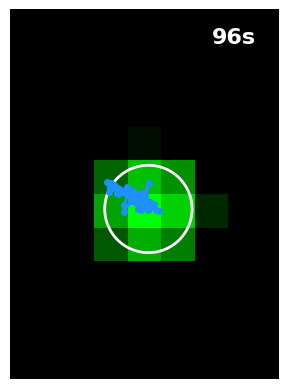

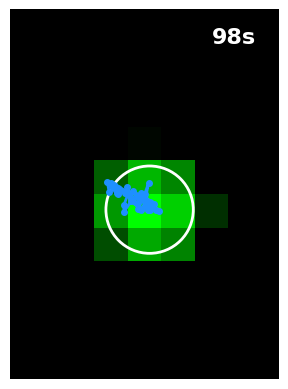

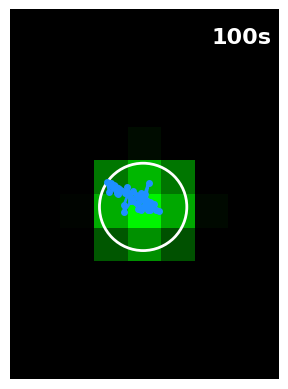

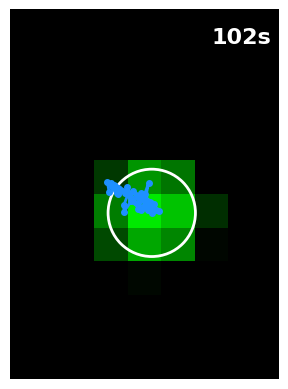

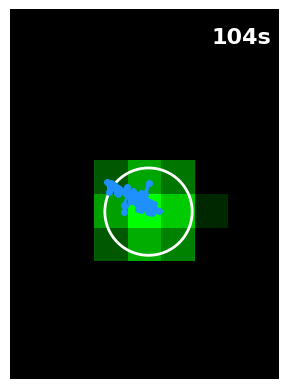

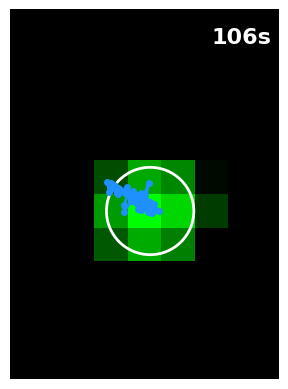

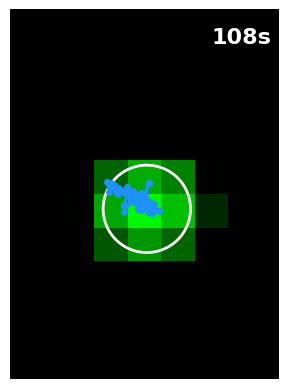

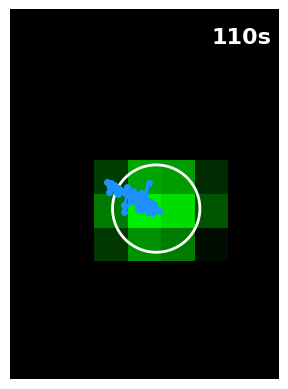

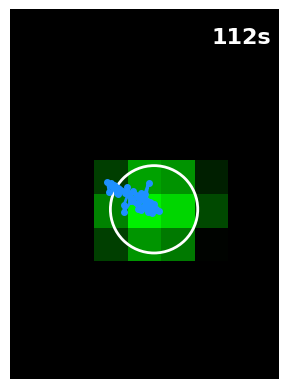

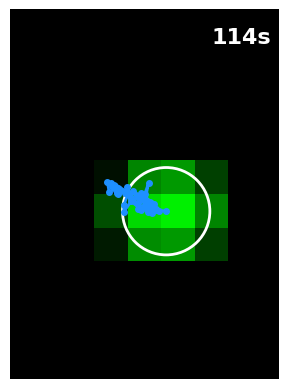

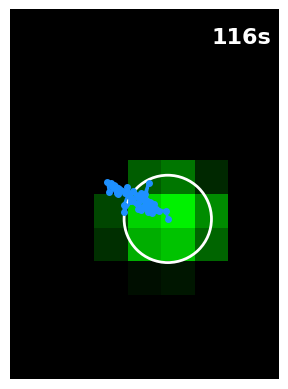

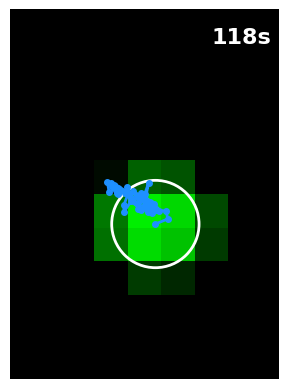

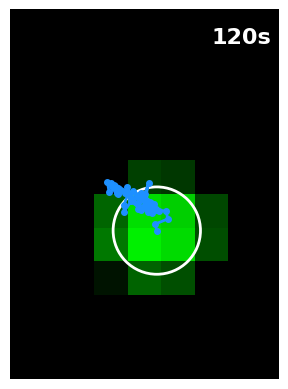

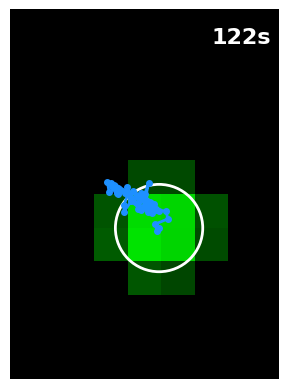

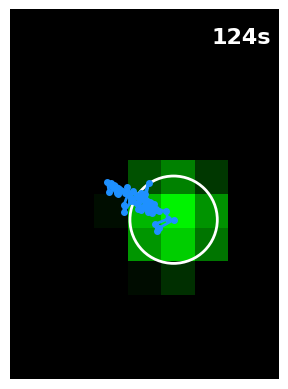

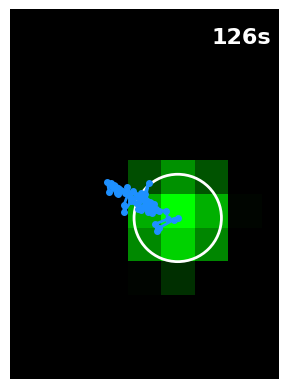

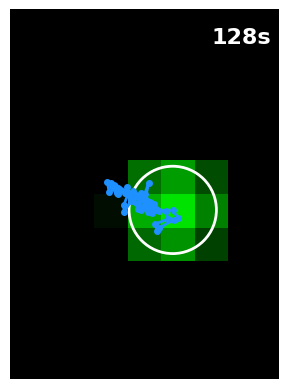

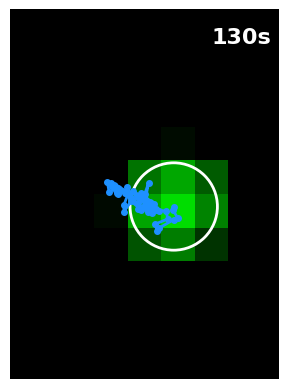

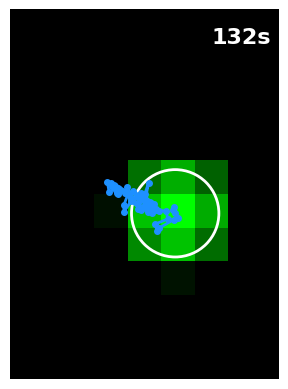

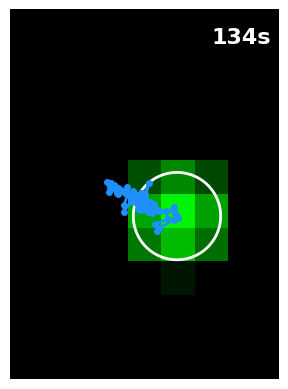

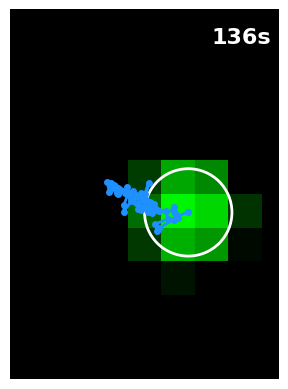

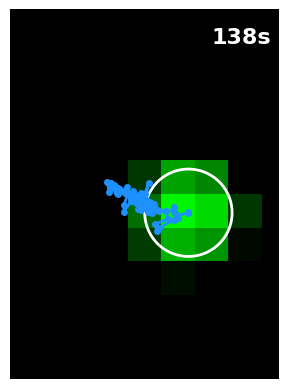

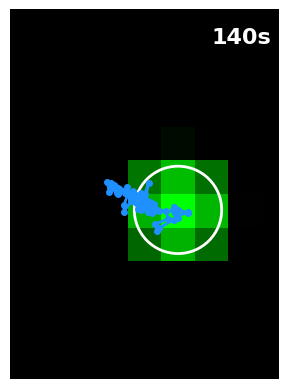

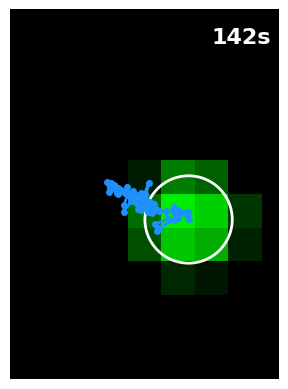

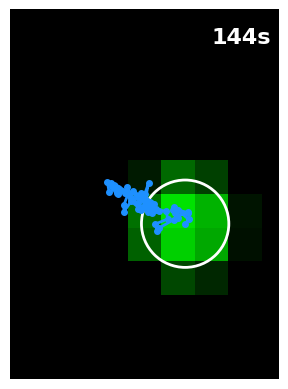

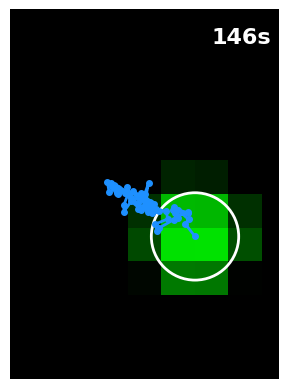

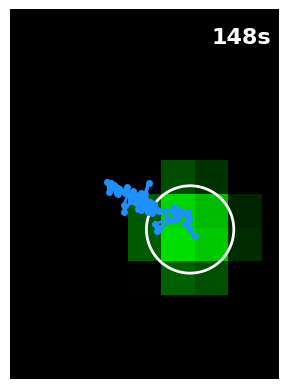

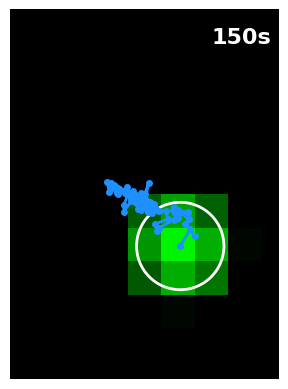

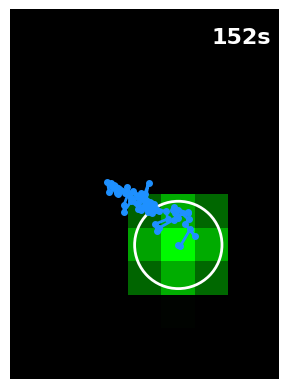

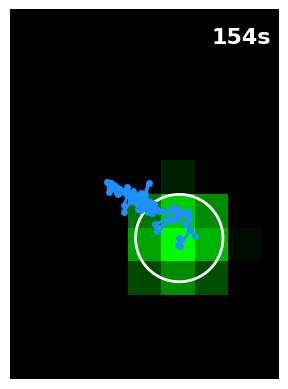

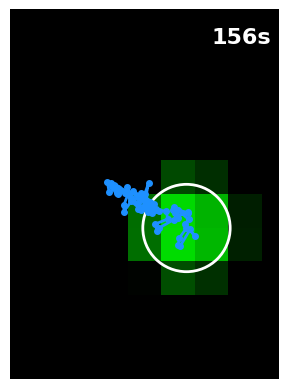

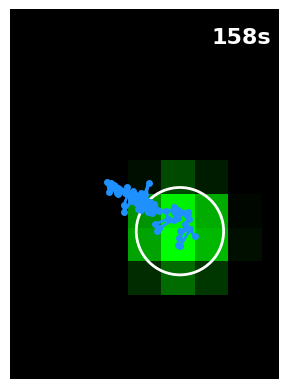

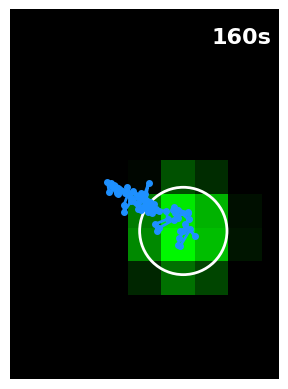

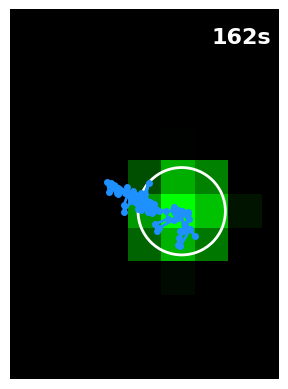

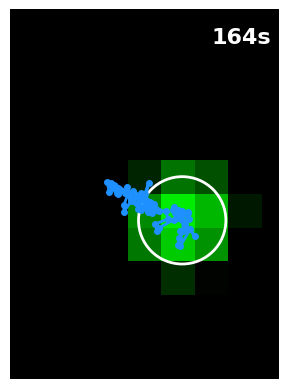

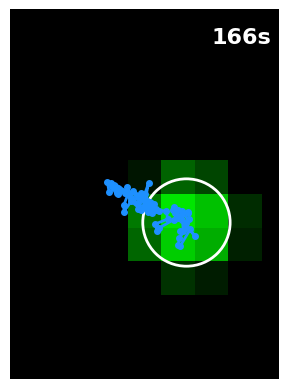

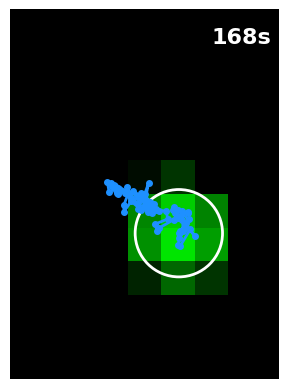

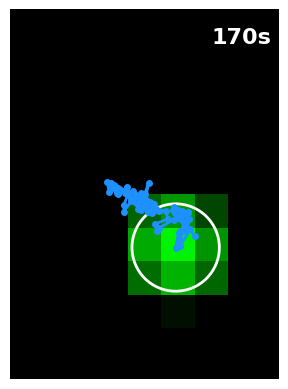

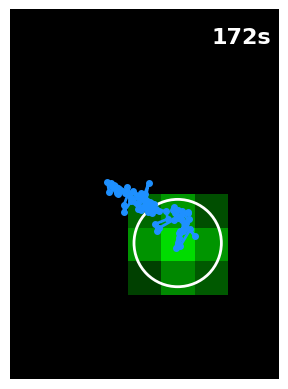

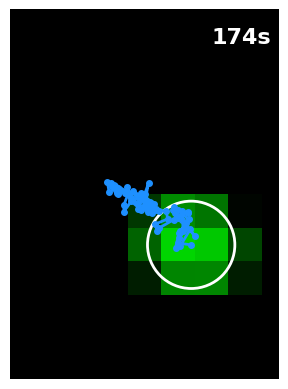

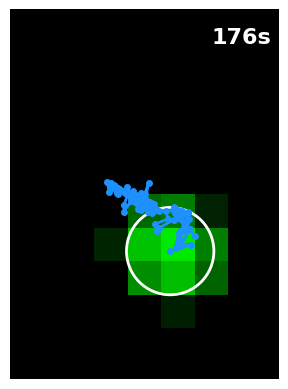

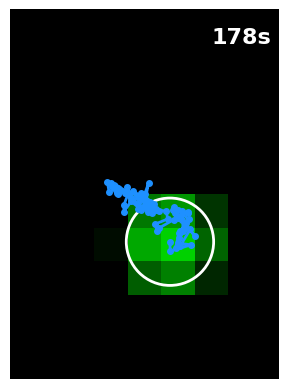

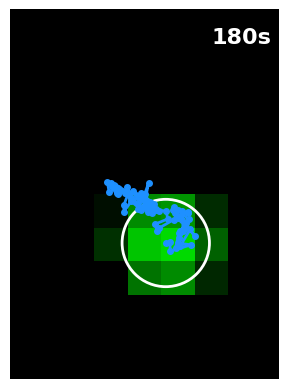

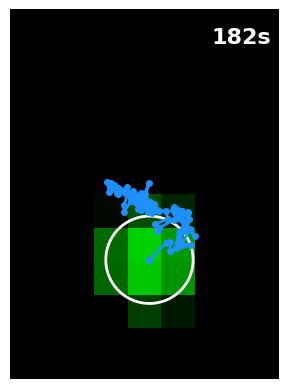

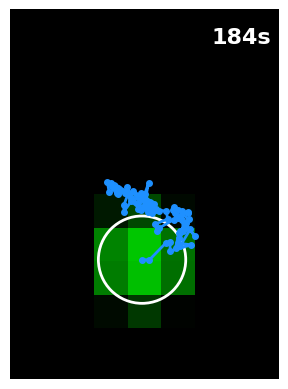

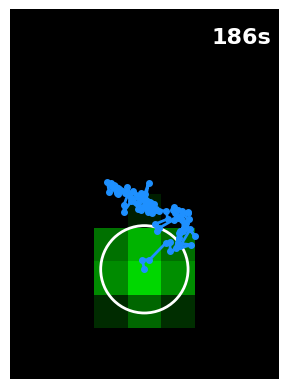

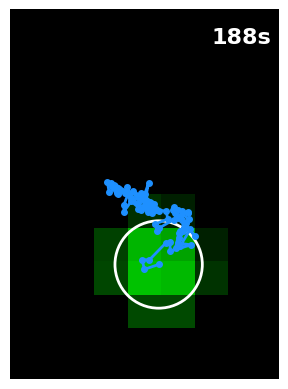

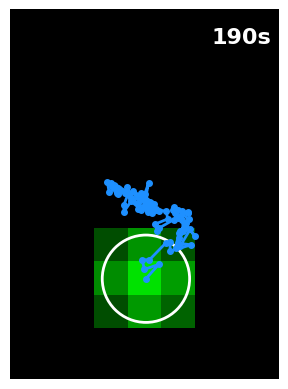

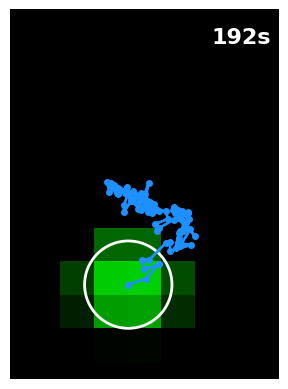

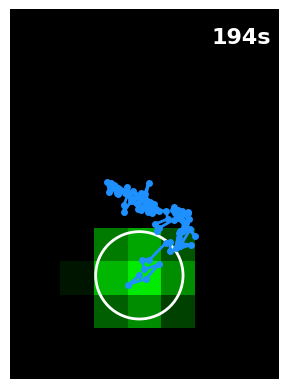

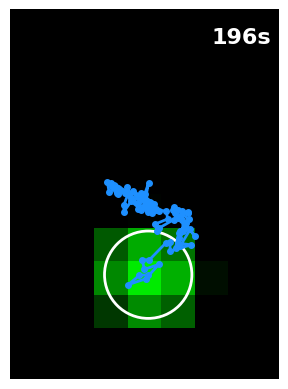

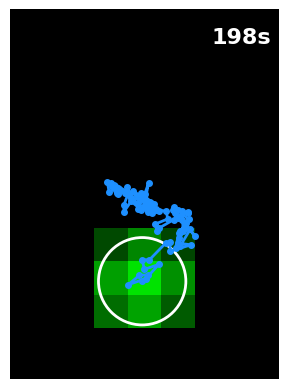

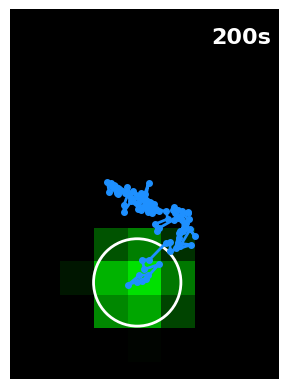

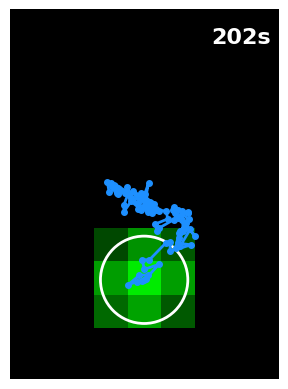

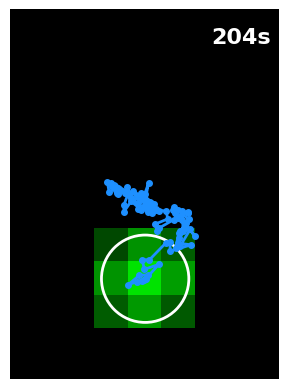

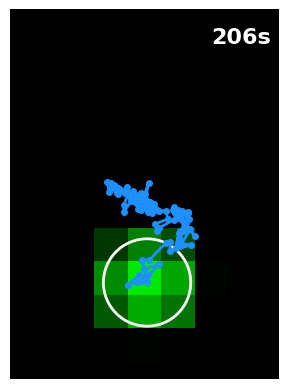

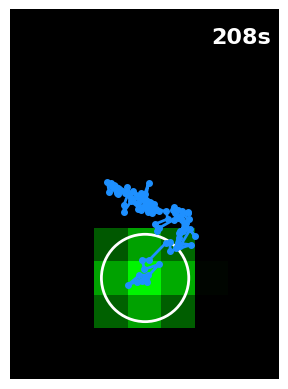

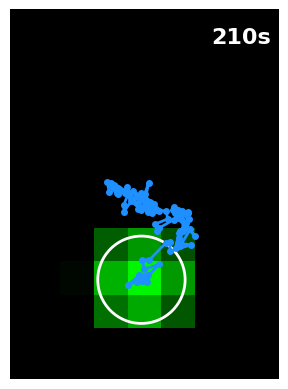

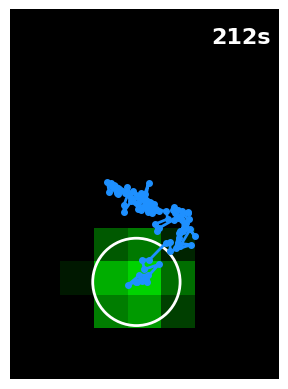

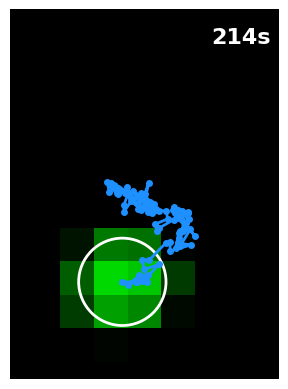

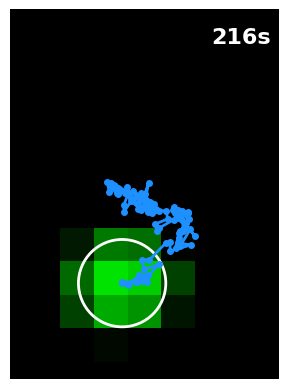

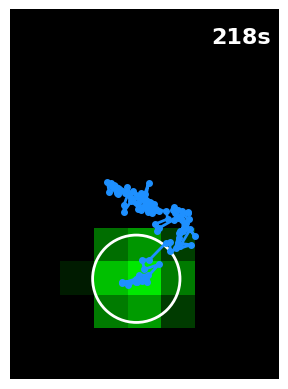

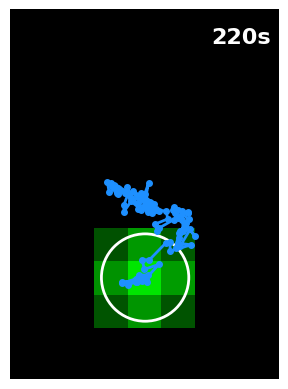

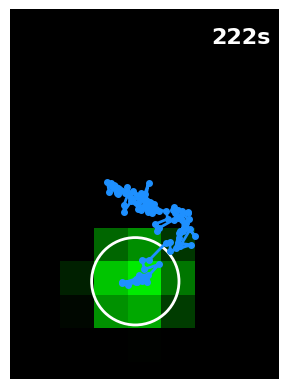

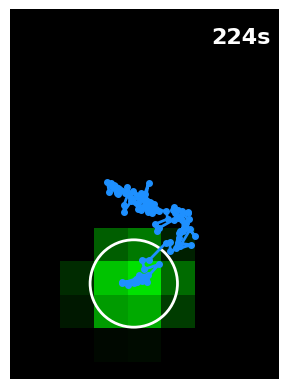

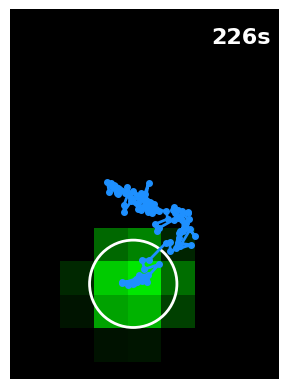

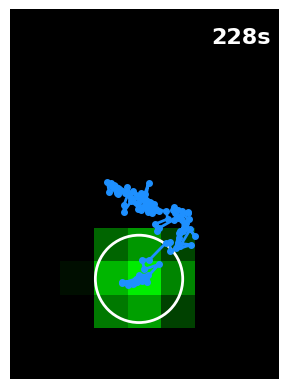

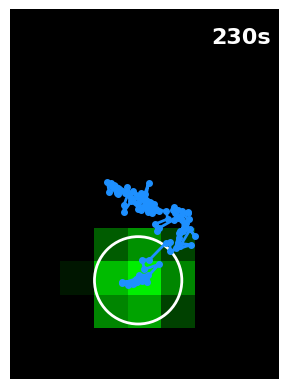

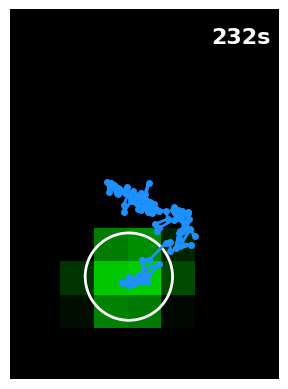

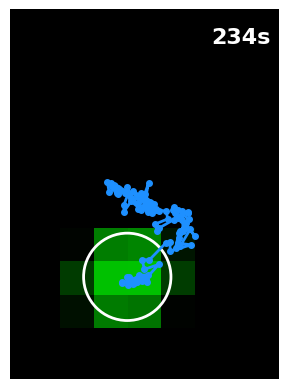

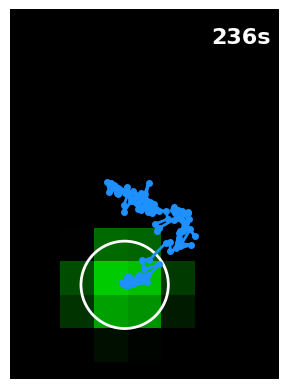

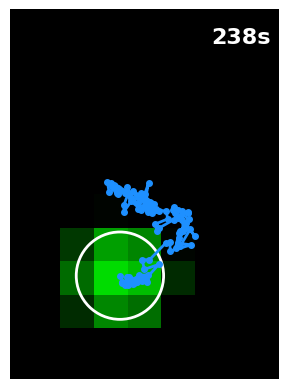

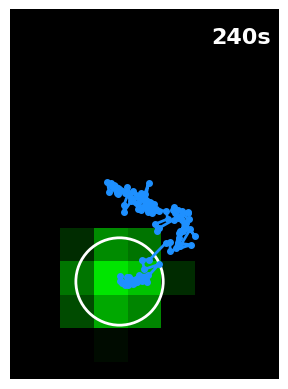

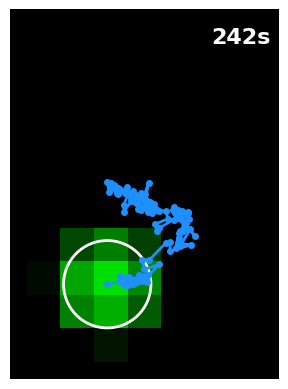

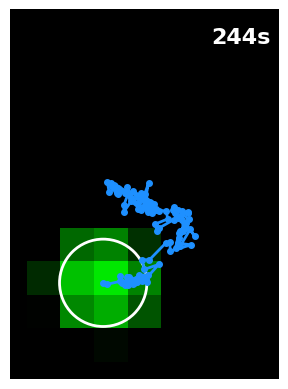

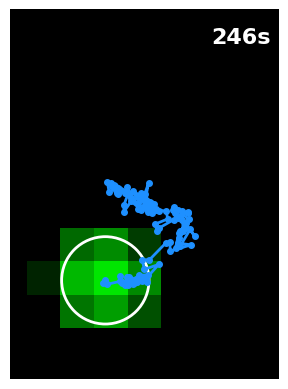

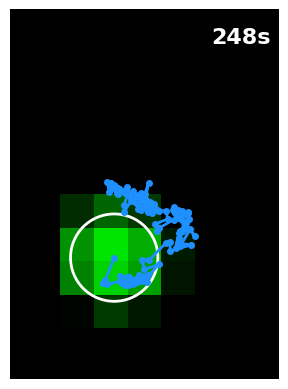

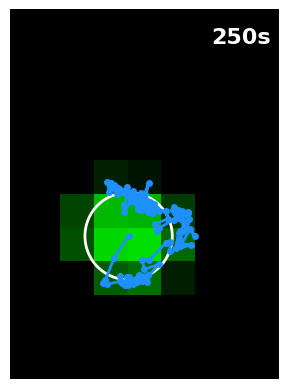

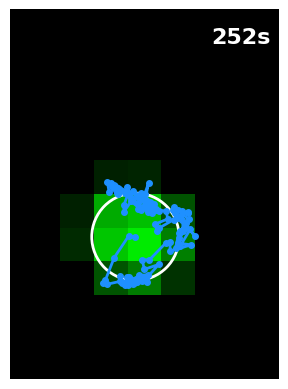

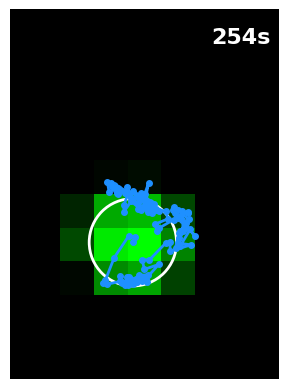

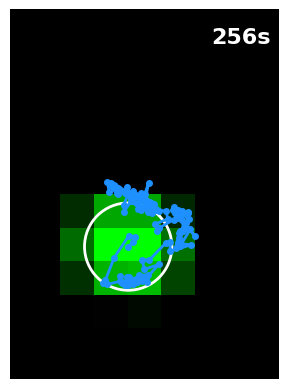

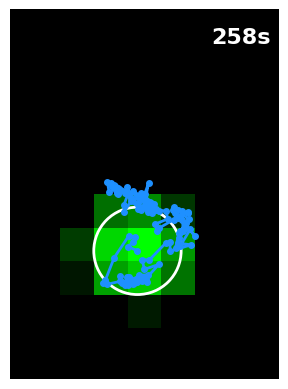

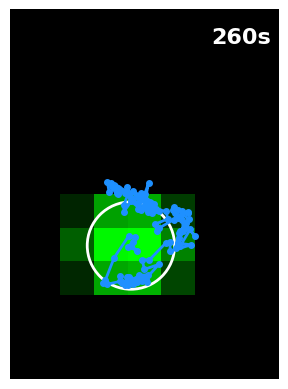

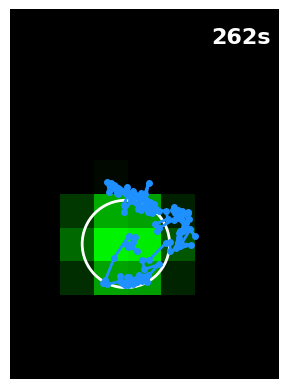

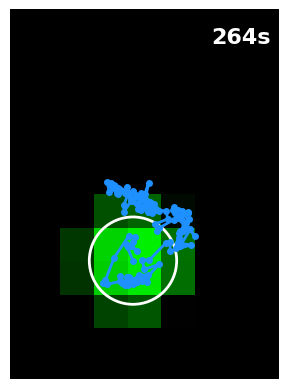

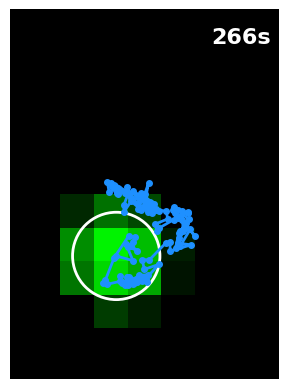

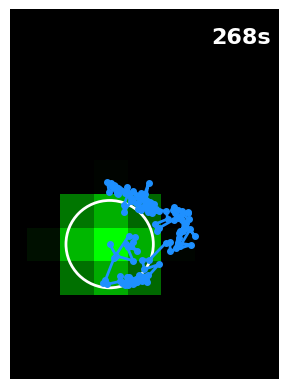

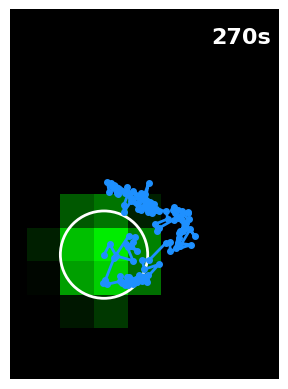

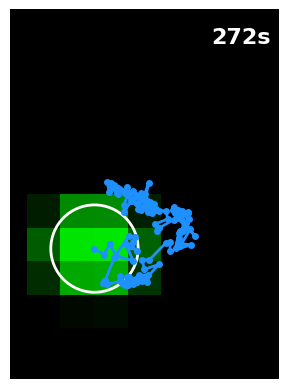

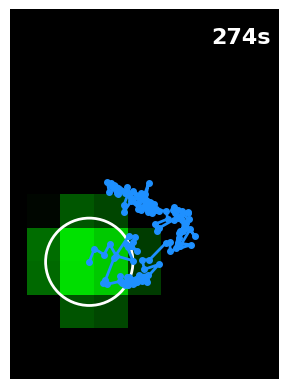

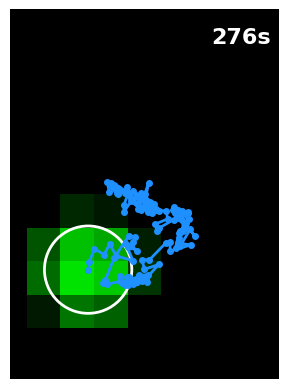

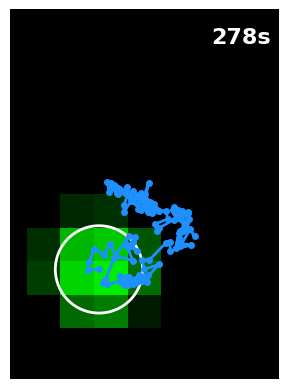

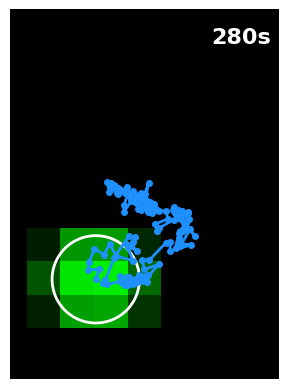

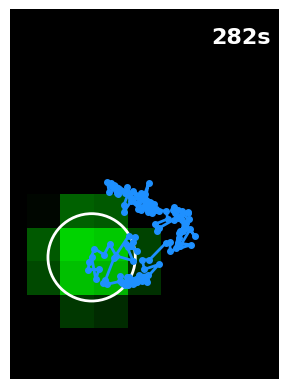

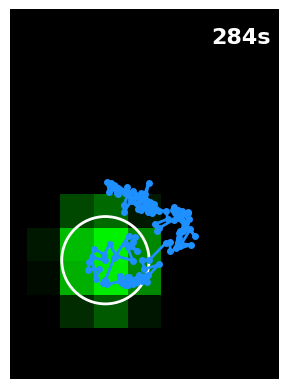

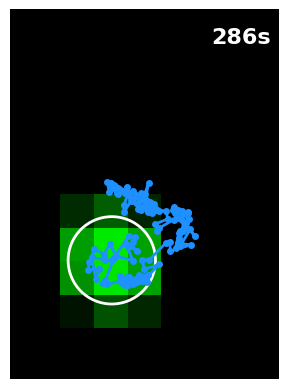

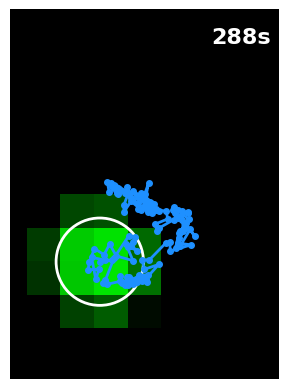

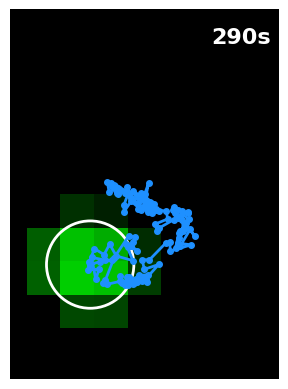

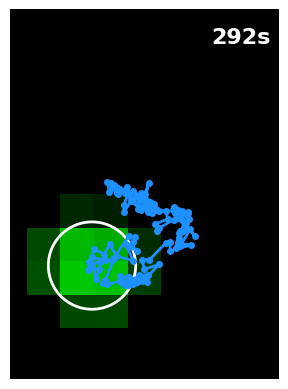

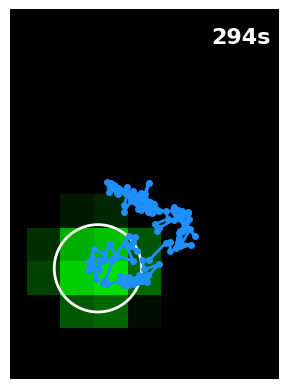

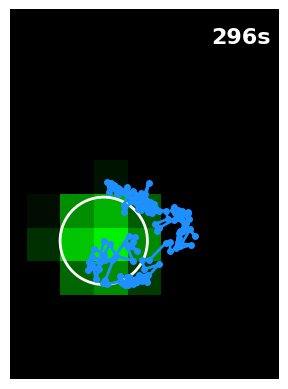

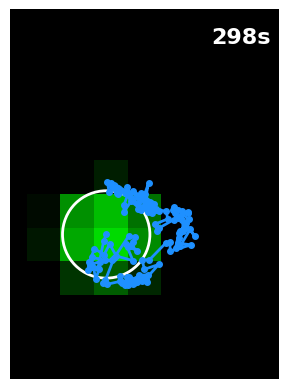

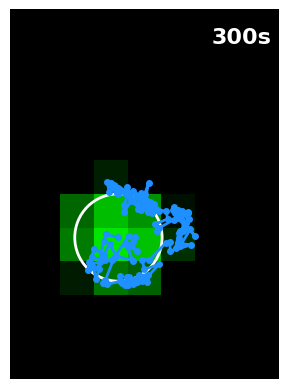

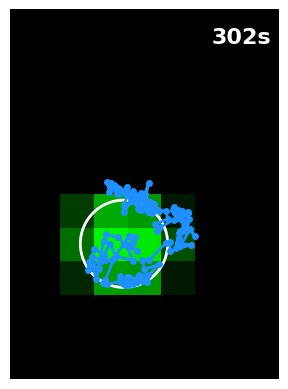

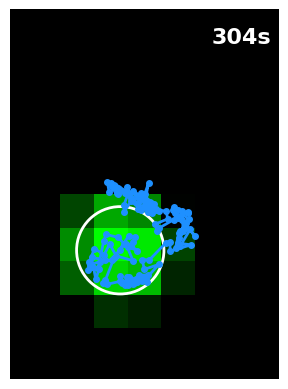

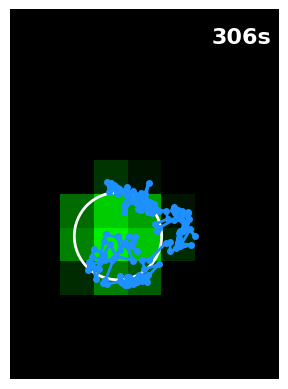

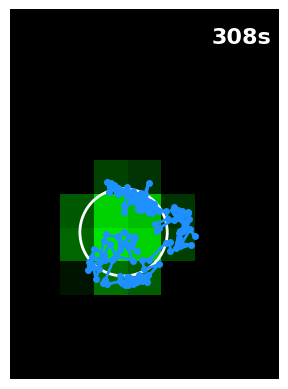

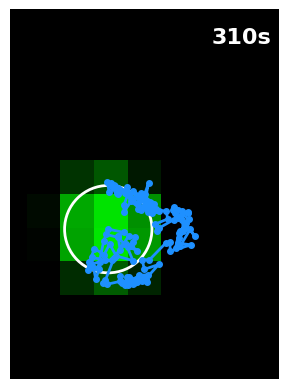

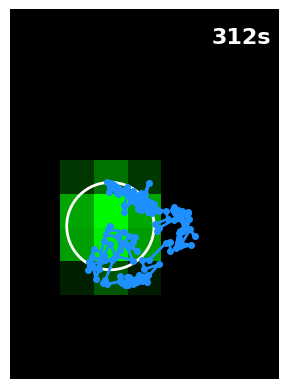

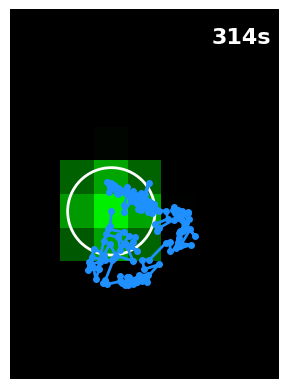

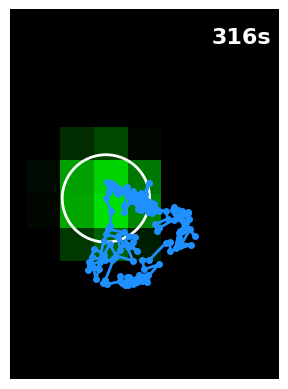

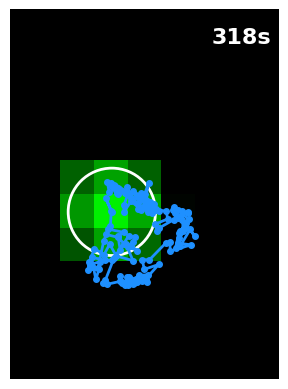

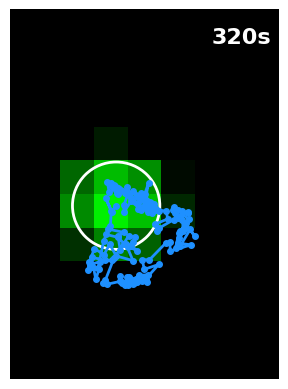

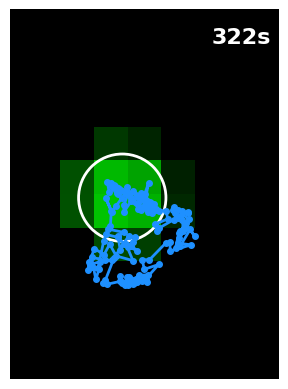

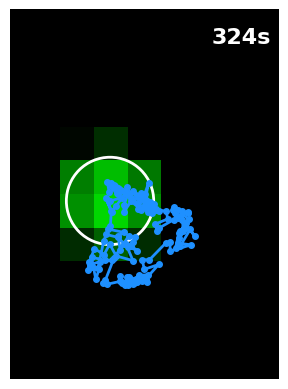

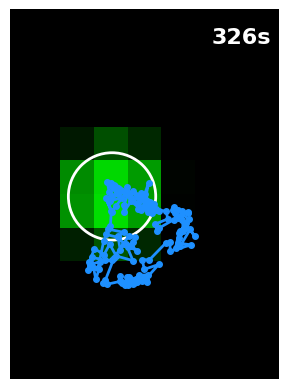

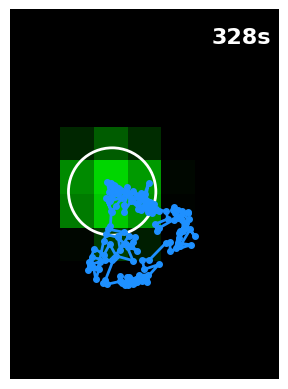

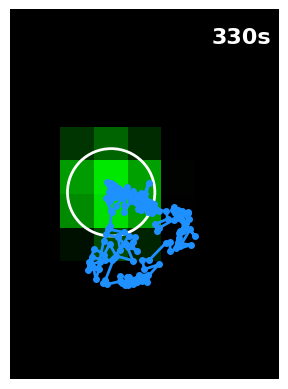

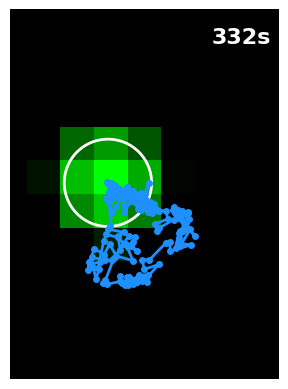

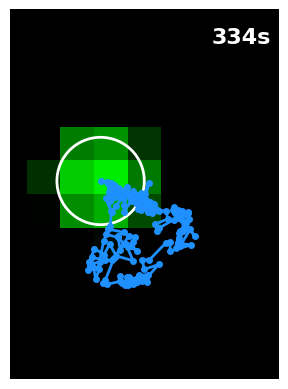

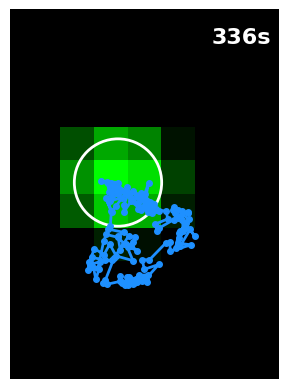

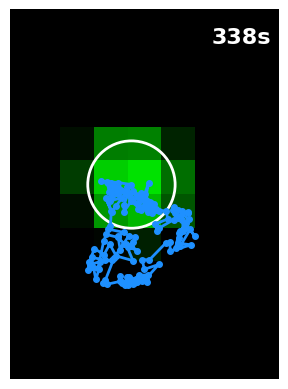

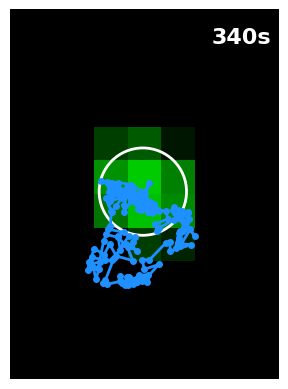

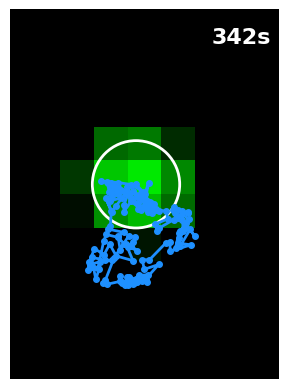

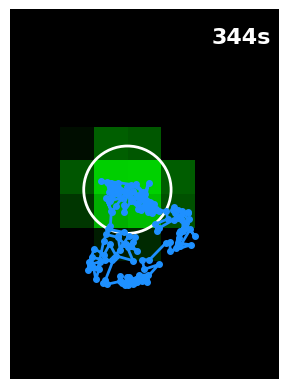

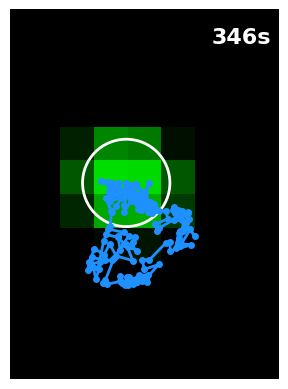

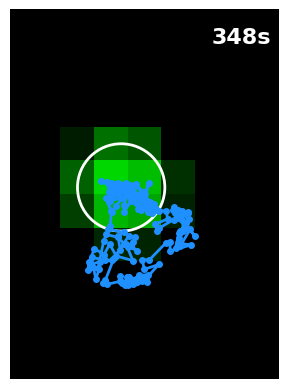

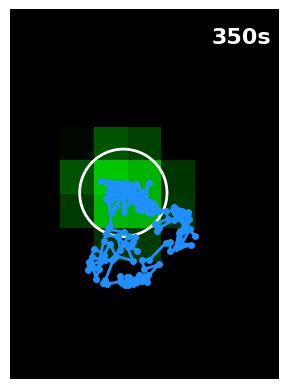

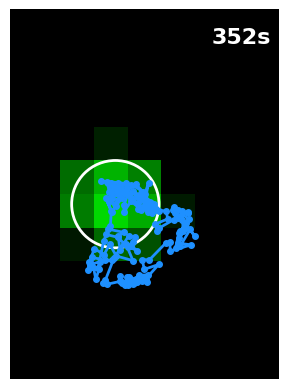

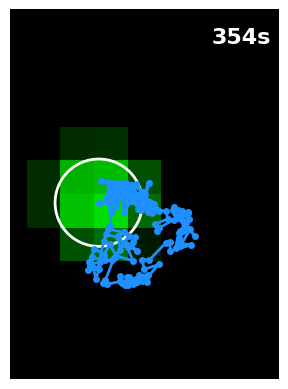

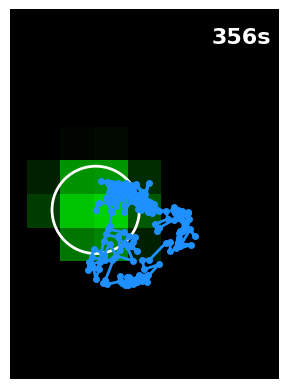

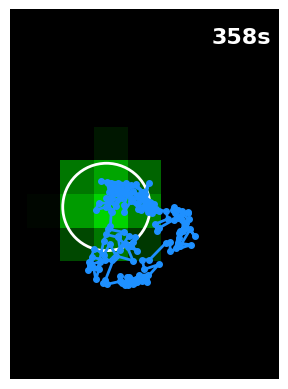

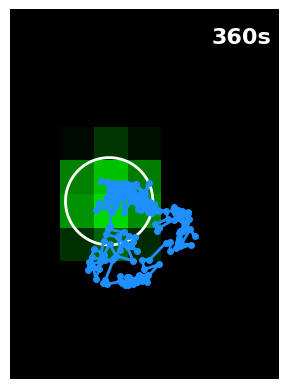

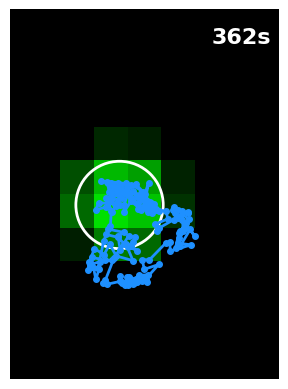

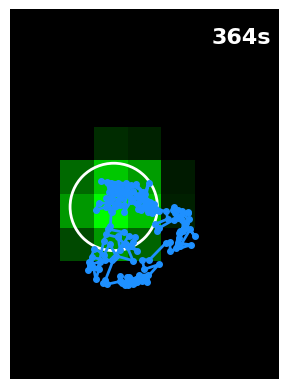

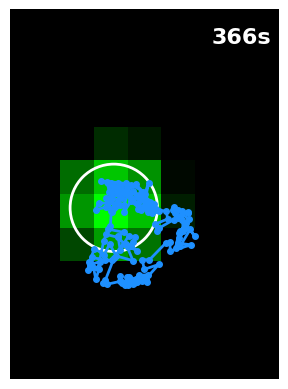

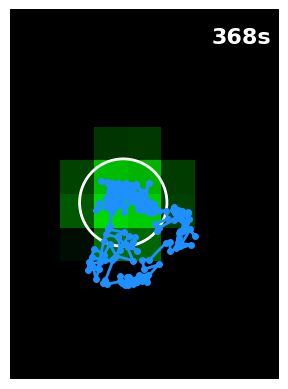

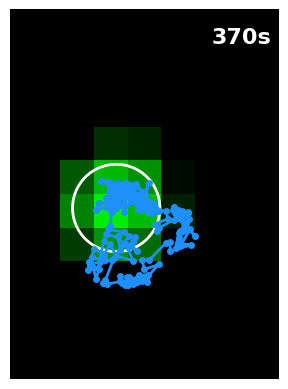

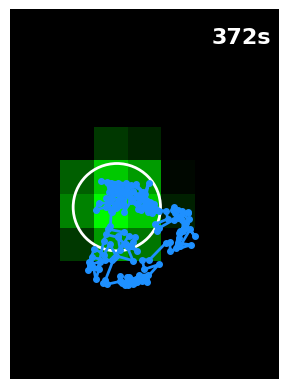

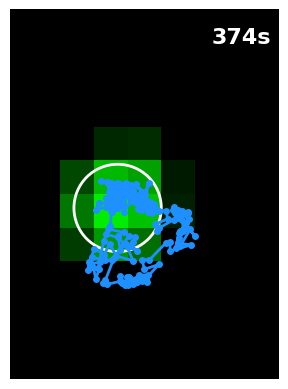

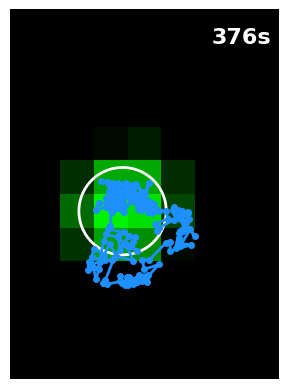

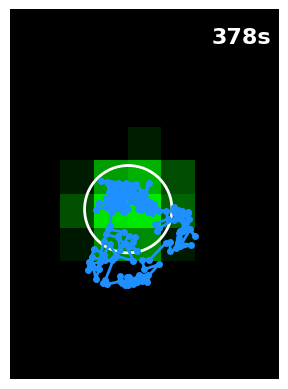

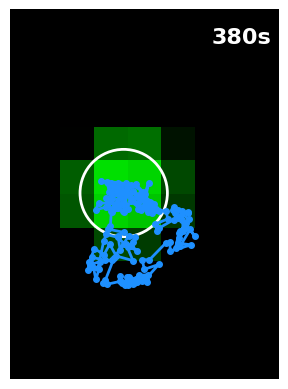

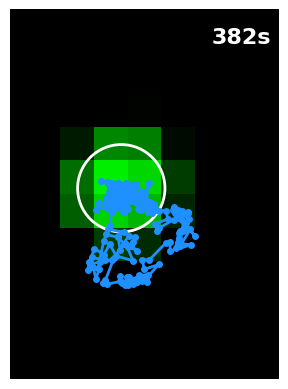

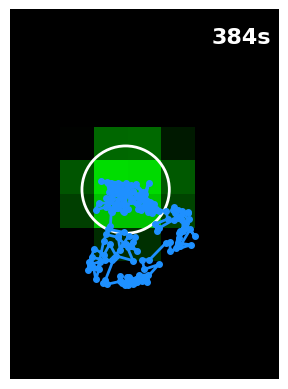

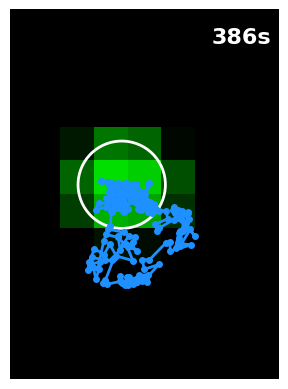

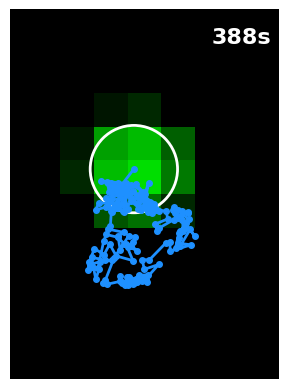

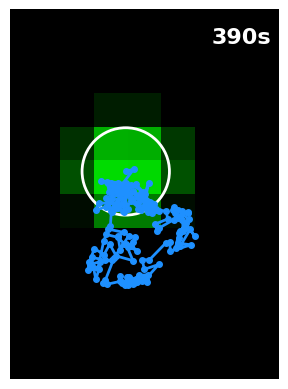

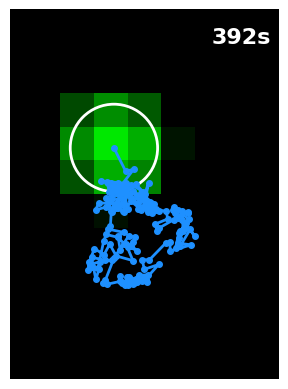

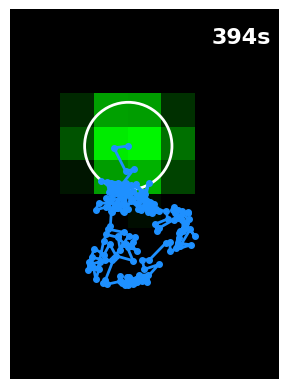

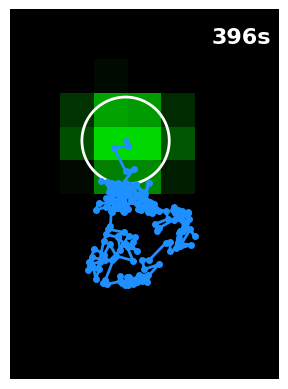

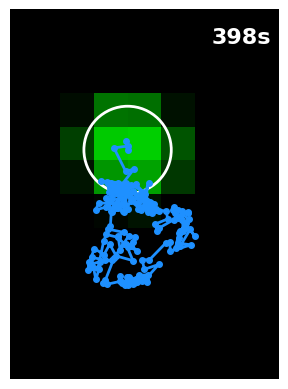

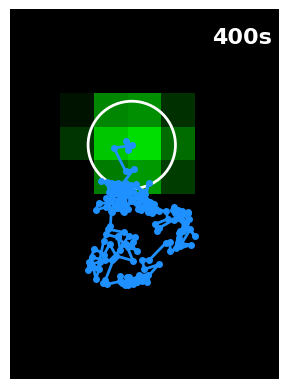

In [42]:
# Configuration parameters
um_per_pixel = 0.117
s_per_frame = 2
folder_data = r"Z:\\Bisal_Halder_turbo\\PROCESSED_DATA\\Impact_of_cytoskeleton_on_HOPS_condensates\\no_drug\\Analysed Data\\2x\\Trackmate analysis new 07052024\\12062024_for_rep_montage"
folder_save = folder_data

tif_filename = "20240118_UGD-2x-2s-replicate1-FOV-2-bandpass.tif"
csv_filename = "20240118_UGD-2x-2s-replicate1-FOV-2-crop2-wstepflags.csv"

# Load the data
os.chdir(folder_data)
video = imread(tif_filename)
df = pd.read_csv(csv_filename)
df = df.sort_values("t")

# Define new parameters for the updated configuration
x_min, x_max = 308, 316
y_min, y_max = 491, 502
track_color_dodger_blue = "dodgerblue"
condensate_color = "#00FF00"
cmap_condensate = clr.LinearSegmentedColormap.from_list("condensateCmap", ["black", condensate_color])

scalebar_length_um = 1
scalebar_length_pxl = scalebar_length_um / um_per_pixel

all_available_frames = set(df["t"].unique())

def animate(frame):
    fig, ax = plt.subplots(1, 1)
    
    # Display the image
    img_red = video[frame - 1, :, :]
    ax.imshow(img_red, cmap=cmap_condensate, vmin=2200, vmax=5000)

    # Add time stamp
    ax.text(
        x_min + 6,
        y_min + 1,
        f"{round(frame * s_per_frame, 2)}s",
        color="white",
        weight="bold",
        size=16,
    )

    # Add tracks for the specified track ID
    for track_id in df['trackID'].unique():
        if track_id != 182:
            continue  # Skip any track that is not the one we're interested in

        track = df[(df["t"] <= frame - 1) & (df['trackID'] == track_id)]
        x_plot = track["x"].to_numpy(float)
        y_plot = track["y"].to_numpy(float)

        # Plot entire track in dodgerblue
        ax.plot(
            x_plot,
            y_plot,
            "-o",
            color=track_color_dodger_blue,
            lw=2,
            markersize=4
        )

    # Highlight current position        
    if frame - 1 in all_available_frames:
        current_df = df[df["t"] == frame - 1]
        for _, row in current_df.iterrows():
            c = plt.Circle(
                (row["x"], row["y"]), 
                1.3, 
                color="white", 
                fill=False, 
                lw=2
            )
            ax.add_patch(c)

    # Add scale bar
    base_x = x_min + 25
    base_y = y_max - 1
    ax.plot(
        [base_x, base_x + scalebar_length_pxl],
        [base_y, base_y],
        "-",
        color="white",
        lw=5,
    )

    # Set viewing area
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.invert_yaxis()
    ax.axis("off")

    # Save the figure
    plt.savefig(join(folder_save, f"confined_frame_{frame:03d}.png"), dpi=600, bbox_inches='tight')
    plt.show()
    plt.close(fig)

# Create montage images
num_frames = 200
for frame in range(1, num_frames + 1):
    animate(frame)

# Optional: Create video
# ani = FuncAnimation(plt.figure(), animate, frames=200, interval=20, repeat=False)
# writer = animation.FFMpegWriter(fps=20)
# ani.save(join(folder_save, "VideoS_HOPS_Confinement_Jump.mp4"), writer=writer, dpi=600)